# Import LIbraries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# profile report
#from ydata_profiling import ProfileReport

# outlier detection
from scipy.stats import zscore
from scipy.stats import t
from scipy.stats import normaltest
import math

#classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, f1_score

#linear models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Tree based models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# association mining
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
#Preprocessing
from imblearn.under_sampling import RandomUnderSampler

import shap

import warnings

# Suppress FutureWarnings related to is_sparse
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics.plot_confusion_matrix import plot_confusion_matrix
from sklearn.metrics import classification_report, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay

In [2]:
#Load the dataset and inspect the data

data = pd.read_csv("prosperLoanData.csv")

In [3]:
#Load description data

data_description = pd.read_excel("Prosper Loan Data - Variable Definitions.xlsx")

# Data Overview

In [4]:
# high-level overview of data shape and composition

print(data.shape)
data.sample(20)

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
58747,A5C23393846674655A60AF3,160781,2007-06-29 23:03:32.147000000,AA,36,Completed,2008-12-31 00:00:00,0.09839,0.0915,0.0865,...,-22.80,0.00,0.00,0.00,0.0,1.0,0,0,0.0,115
84185,D3DB3421971232837129213,336607,2008-05-21 11:01:54.313000000,D,36,Completed,2011-02-10 00:00:00,0.24264,0.2200,0.2100,...,-25.24,0.00,0.00,0.00,0.0,1.0,0,0,0.0,36
37959,BFD63387539641796CE8450,128676,2007-04-25 14:44:37.603000000,C,36,Completed,2010-02-01 00:00:00,0.17521,0.1680,0.1530,...,-121.43,0.00,0.00,0.00,0.0,1.0,0,0,0.0,146
109495,27593586524845340AED75F,861165,2013-08-06 00:45:29.977000000,NaN,36,Current,NaN,0.28780,0.2492,0.2392,...,-19.19,0.00,0.00,0.00,0.0,1.0,0,0,0.0,44
107590,BF733389591978792BEA937,134616,2007-05-08 17:17:54.947000000,E,36,Chargedoff,2010-02-16 00:00:00,0.30168,0.2900,0.2800,...,-69.97,-320.58,1716.54,1716.54,0.0,1.0,0,0,0.0,19
75175,0C593595617720357596DAF,1009144,2013-11-21 17:26:30.870000000,NaN,60,Current,NaN,0.18913,0.1655,0.1555,...,-37.39,0.00,0.00,0.00,0.0,1.0,0,0,0.0,42
9193,91EB337390555548310187F,67717,2006-11-28 16:06:01.160000000,HR,36,Chargedoff,2008-05-12 00:00:00,0.29776,0.2900,0.2650,...,-7.92,-37.65,2002.05,2002.06,0.0,1.0,0,0,0.0,6
81569,61063564971623070B93A52,681702,2012-12-03 10:13:38.510000000,NaN,60,Current,NaN,0.27462,0.2489,0.2389,...,-54.93,0.00,0.00,0.00,0.0,1.0,0,0,0.0,78
11985,05113589569985890E2C096,919013,2013-09-23 10:51:46.290000000,NaN,36,Completed,2014-01-29 00:00:00,0.13799,0.1099,0.0999,...,-44.44,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
73917,634F34321603460790613F1,400861,2008-09-19 07:57:14.350000000,AA,36,Chargedoff,2009-09-02 00:00:00,0.24753,0.2400,0.2300,...,-118.57,0.00,21960.70,21960.70,0.0,1.0,1,1,8500.0,325


In [5]:
# print 20 samples of the data description
data_description.sample(20)

,Variable,Description
12,EstimatedReturn,The estimated return assigned to the listing a...
19,EmploymentStatus,The employment status of the borrower at the t...
1,ListingNumber,The number that uniquely identifies the listin...
25,CreditScoreRangeLower,The lower value representing the range of the ...
59,LoanCurrentDaysDelinquent,The number of days delinquent.
35,CurrentDelinquencies,Number of accounts delinquent at the time the ...
50,LoanKey,Unique key for each loan. This is the same key...
5,LoanStatus,"The current status of the loan: Cancelled, Cha..."
45,TradesOpenedLast6Months,Number of trades opened in the last 6 months a...
55,ProsperPaymentsOneMonthPlusLate,Number of payments the borrower made on Prospe...


In [6]:
# view data columns
data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [7]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
# descriptive statistics for numeric variables
data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [9]:
# Check for duplicates

data.duplicated().sum()

0

In [10]:
# Check for null values

data.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [11]:
# Calculate the percentage of missing values for each column
missing_percentages = data.isna().sum() * 100 / len(data)

# Sort the missing percentages in descending order
missing_percentages_sorted = missing_percentages.sort_values(ascending=False)

# Print the sorted results with one decimal place
print(missing_percentages_sorted.apply(lambda x: f"{x:.1f}%").head(50))

GroupKey                               88.3%
LoanFirstDefaultedCycleNumber          85.1%
ScorexChangeAtTimeOfListing            83.4%
ProsperPrincipalOutstanding            80.6%
ProsperPrincipalBorrowed               80.6%
ProsperPaymentsOneMonthPlusLate        80.6%
ProsperPaymentsLessThanOneMonthLate    80.6%
OnTimeProsperPayments                  80.6%
TotalProsperLoans                      80.6%
TotalProsperPaymentsBilled             80.6%
CreditGrade                            74.6%
ClosedDate                             51.6%
ProsperRating (Alpha)                  25.5%
ProsperScore                           25.5%
EstimatedReturn                        25.5%
ProsperRating (numeric)                25.5%
EstimatedLoss                          25.5%
EstimatedEffectiveYield                25.5%
DebtToIncomeRatio                       7.5%
EmploymentStatusDuration                6.7%
AmountDelinquent                        6.7%
CurrentCreditLines                      6.7%
BankcardUt

### Inspect Columns

In [12]:
# view columns with less or equal to 50 values
for column in data:
    unique_values = data[column].unique()
    if len(unique_values) <= 50:
        print(f"Column '{column}' unique values: {unique_values}")

Column 'CreditGrade' unique values: ['C' nan 'HR' 'AA' 'D' 'B' 'E' 'A' 'NC']
Column 'Term' unique values: [36 60 12]
Column 'LoanStatus' unique values: ['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']
Column 'ProsperRating (numeric)' unique values: [nan  6.  3.  5.  2.  4.  7.  1.]
Column 'ProsperRating (Alpha)' unique values: [nan 'A' 'D' 'B' 'E' 'C' 'AA' 'HR']
Column 'ProsperScore' unique values: [nan  7.  9.  4. 10.  2. 11.  8.  5.  3.  6.  1.]
Column 'ListingCategory (numeric)' unique values: [ 0  2 16  1  7 13  6 15 20 19  3 18  8  4 11 14  5  9 17 10 12]
Column 'EmploymentStatus' unique values: ['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other' nan
 'Not employed' 'Part-time' 'Retired']
Column 'IsBorrowerHomeowner' unique values: [ True False]
Column 'CurrentlyInGroup' unique values: [ T

# Data Issues Summary

- Create a copy of the dataset.
- Drop irrelevant columns

- Convert LoanOriginationDate to Datetime type

- Create a Listingyear column from the LoanOriginationDate and convert to category datatype.

- Rename and Replace ListingCategory (numeric) with the respective values (0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans).

- Convert IncomeRange to category datatype.

- Convert LoanStatus to category datatype (Current, Completed, Chargedoff, Defaulted,Past Due (1-15 days), Past Due (31-60 days), Past Due (61-90 days), Past Due (91-120 days), Past Due (16-30 days), FinalPaymentInProgress, Past Due (>120 days), Cancelled                    

- Replace null values of Employment status with Not available.

- Replace null values of BorrowerState with Not available.

- Replace null values of DebtToIncomeRatio with the mean.

- Merge ProsperRating (Alpha) and CreditGrade to combine ratings before 2009 and after 2009.

- Convert the merged rating to category datatype (NC > HR > E > D > C > B > A > AA) i.e. HR is the riskiest loan and AA is the least risky loan. NC means no credit grade.

- Convert Term to category datatype.
- Subset the dataframe by selecting features of interest

## Data Preprocessing

### Create a copy

In [13]:
df_copy = data.copy()
df_copy.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
83823,E09B35975603704326672EC,1059539,2013-12-08 04:26:13.033000000,NaN,36,Current,NaN,0.16324,0.1274,0.1174,...,-25.19,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
30402,D43D35735651098254EF6F1,737881,2013-03-26 13:03:53.557000000,NaN,36,Current,NaN,0.28780,0.2492,0.2392,...,-33.16,0.00,0.0,0.0,0.0,1.0,0,0,0.0,65
89256,C8A935439496919508D8588,577640,2012-04-11 19:30:58.777000000,NaN,36,Current,NaN,0.21372,0.1768,0.1668,...,-166.13,0.00,0.0,0.0,0.0,1.0,0,0,0.0,211
88797,9F5D3558604897259E1C547,648617,2012-10-02 17:34:46.600000000,NaN,36,Past Due (1-15 days),NaN,0.32333,0.2839,0.2739,...,-47.14,-141.35,0.0,0.0,0.0,1.0,0,0,0.0,69
80933,C3E035199103858964F8497,512995,2011-06-26 08:25:03.477000000,NaN,36,Current,NaN,0.35643,0.3199,0.3099,...,-60.67,0.00,0.0,0.0,0.0,1.0,0,0,0.0,29
108436,D34D336544943308351B5AE,3865,2006-03-27 18:09:12,E,36,Completed,2009-02-02 00:00:00,0.25255,0.2450,0.2150,...,-33.76,0.00,0.0,0.0,0.0,1.0,0,0,0.0,61
92101,F0F636004499238070EA1E2,1159773,2014-01-23 23:25:29.177000000,NaN,36,Current,NaN,0.14206,0.1139,0.1039,...,-3.40,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
91548,833D34201746010699BD012,328934,2008-05-08 15:19:43.503000000,HR,36,Completed,2011-05-23 00:00:00,0.37453,0.3500,0.3400,...,-21.59,0.00,0.0,0.0,0.0,1.0,2,1,50.0,8
70173,08583425297623143D94A71,359864,2008-06-30 11:12:18.830000000,A,36,Completed,2011-07-10 00:00:00,0.10033,0.0865,0.0765,...,-80.44,0.00,0.0,0.0,0.0,1.0,0,0,0.0,180
73250,F30234270702662998E40C3,373604,2008-07-26 10:42:36.373000000,B,36,Completed,2010-03-30 00:00:00,0.11596,0.1020,0.0920,...,-27.16,0.00,0.0,0.0,0.0,1.0,1,0,0.0,84


### Drop irrevant columns based on data description
- Drop columns that start with LP
- Drop columns with Investment
- Drop columns with Trades
- Drop columns with PublicRecords
- Drop columns with Inquires
- Drop columns with Revolving Accounts
- Drop columns with CreditLines
- Drop Delinquencies
- Drop LenderYield- same as borrower rate
- Drop Dates
- Drop Keys

In [14]:
# Function to drop columns that start with LP_
def drop_columns_by_prefix(df, prefix):
    columns_to_drop = [col for col in df.columns if col[:3] == prefix]
    df.drop(columns=columns_to_drop, inplace=True)

# Drop columns with a prefix 'LP_'
drop_columns_by_prefix(df_copy, 'LP_')

columns_to_drop = ['PublicRecordsLast12Months', 'PublicRecordsLast10Years',"TotalTrades", 
                   "TradesNeverDelinquent (percentage)","TradesOpenedLast6Months",'TotalInquiries', 'InquiriesLast6Months',
                   'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors', 'PercentFunded', 
                   'LenderYield', 'LoanCurrentDaysDelinquent', 'DelinquenciesLast7Years', 'TotalCreditLinespast7years', 
                   'DateCreditPulled', 'ListingCreationDate', 'LoanOriginationQuarter', 'LoanMonthsSinceOrigination', 
                   'CurrentCreditLines','OpenCreditLines', 'CurrentDelinquencies', 'AmountDelinquent', 'BorrowerState', 
                   'Occupation','LoanOriginationDate','GroupKey', 'MemberKey', 'LoanKey', 'ListingKey',
                   'ProsperPrincipalOutstanding','ProsperPrincipalBorrowed','ProsperPaymentsOneMonthPlusLate',
                   'ProsperPaymentsLessThanOneMonthLate','OnTimeProsperPayments','TotalProsperLoans',
                   'TotalProsperPaymentsBilled', 'TotalProsperLoans','TotalProsperPaymentsBilled','ClosedDate',
                   'ProsperScore','ProsperRating (numeric)', 'ProsperRating (Alpha)']

# Drop the specified columns
df_copy = df_copy.drop(columns=columns_to_drop)

### Check

In [15]:
df_copy.columns

Index(['ListingNumber', 'CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR',
       'BorrowerRate', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ListingCategory (numeric)', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'RevolvingCreditBalance',
       'BankcardUtilization', 'AvailableBankcardCredit', 'DebtToIncomeRatio',
       'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome',
       'ScorexChangeAtTimeOfListing', 'LoanFirstDefaultedCycleNumber',
       'LoanNumber', 'LoanOriginalAmount', 'MonthlyLoanPayment',
       'Recommendations'],
      dtype='object')

### Treating Missing Values

In [16]:
# drop columns with high missing values

df_copy = df_copy.drop(['LoanFirstDefaultedCycleNumber','ScorexChangeAtTimeOfListing','EstimatedReturn','EstimatedReturn',
                        'EstimatedLoss','EstimatedEffectiveYield','FirstRecordedCreditLine', 'CurrentlyInGroup',
                        'ListingNumber','LoanNumber','CreditGrade'], axis=1)

In [17]:
df_copy.columns

Index(['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'ListingCategory (numeric)', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeRange',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'Recommendations'],
      dtype='object')

### Check

In [18]:
# Calculate the percentage of missing values for each column
missing_percentages = df_copy.isna().sum() * 100 / len(df_copy)

# Sort the missing percentages in descending order
missing_percentages_sorted = missing_percentages.sort_values(ascending=False)

# Print the sorted results with one decimal place
print(missing_percentages_sorted.apply(lambda x: f"{x:.1f}%").head(50))

DebtToIncomeRatio              7.5%
EmploymentStatusDuration       6.7%
RevolvingCreditBalance         6.7%
BankcardUtilization            6.7%
AvailableBankcardCredit        6.6%
EmploymentStatus               2.0%
CreditScoreRangeLower          0.5%
CreditScoreRangeUpper          0.5%
BorrowerAPR                    0.0%
Term                           0.0%
MonthlyLoanPayment             0.0%
LoanOriginalAmount             0.0%
StatedMonthlyIncome            0.0%
IncomeVerifiable               0.0%
IncomeRange                    0.0%
OpenRevolvingMonthlyPayment    0.0%
LoanStatus                     0.0%
OpenRevolvingAccounts          0.0%
IsBorrowerHomeowner            0.0%
ListingCategory (numeric)      0.0%
BorrowerRate                   0.0%
Recommendations                0.0%
dtype: object


### Treat Employment
- EmploymentStatus - The employment status of the borrower at the time they posted the listing.

In [19]:
df_copy.EmploymentStatus.isnull().sum()

2255

In [20]:
# Specify the value to replace missing values with
replacement_value = "Not available"  # Replace missing values with Not available

# Replace missing values in Occupation with the specified replacement value
df_copy.EmploymentStatus.fillna(replacement_value, inplace=True)


In [21]:
df_copy['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       'Not employed', 'Part-time', 'Retired'], dtype=object)

In [22]:
#Rename the values using the str.replace method
df_copy["EmploymentStatus"] =df_copy["EmploymentStatus"].str.replace("Employed", "Full-time")


### Check

In [23]:
df_copy['EmploymentStatus'].unique()

array(['Self-employed', 'Full-time', 'Not available', 'Other',
       'Not employed', 'Part-time', 'Retired'], dtype=object)

### Treat EmploymentStatusDuration

In [24]:
df_copy["EmploymentStatusDuration"].value_counts()

EmploymentStatusDuration
0.0      1534
4.0      1186
1.0      1177
3.0      1174
2.0      1153
         ... 
648.0       1
662.0       1
733.0       1
690.0       1
578.0       1
Name: count, Length: 605, dtype: int64

In [25]:
df_copy["EmploymentStatusDuration"].isnull().sum()

7625

In [26]:
#Itterative Imputer (person_emp_length)
iter_imp=IterativeImputer(max_iter=10,random_state=0)
df_copy[["EmploymentStatusDuration"]]=iter_imp.fit_transform(df_copy[["EmploymentStatusDuration"]])


In [27]:
df_copy["EmploymentStatusDuration"].value_counts()

EmploymentStatusDuration
96.071582     7625
0.000000      1534
4.000000      1186
1.000000      1177
3.000000      1174
              ... 
648.000000       1
662.000000       1
733.000000       1
690.000000       1
578.000000       1
Name: count, Length: 606, dtype: int64

In [28]:
#df_copy.dropna(subset=["EmploymentStatusDuration"], inplace=True)

In [29]:
df_copy["EmploymentStatusDuration"].isnull().sum()

0


###  Treat AvailableBankcardCredit

In [30]:
df_copy['AvailableBankcardCredit'].value_counts()

AvailableBankcardCredit
0.0        4881
500.0       303
300.0       151
1000.0      145
2000.0      134
           ... 
23067.0       1
70401.0       1
20374.0       1
60444.0       1
34415.0       1
Name: count, Length: 31829, dtype: int64

In [31]:
df_copy["AvailableBankcardCredit"].isnull().sum()

7544

In [32]:
#Itterative Imputer (availablebankcardcredit)
iter_imp=IterativeImputer(max_iter=10,random_state=0)
df_copy[["AvailableBankcardCredit"]]=iter_imp.fit_transform(df_copy[["AvailableBankcardCredit"]])


### Check

In [33]:
df_copy['AvailableBankcardCredit'].isnull().sum()

0

### Treat Credit Score

In [34]:
# Merge the columns with a '-' delimiter to create the 'CreditScoreRange' column
df_copy['CreditScoreRange'] = df_copy['CreditScoreRangeLower'].astype(str) + '-' + df_copy['CreditScoreRangeUpper'].astype(str)

# Convert the 'CreditScoreRange' column to the categorical datatype
df_copy['CreditScoreRange'] = pd.Categorical(df_copy['CreditScoreRange'])

def calculate_credit_score(credit_score_range):
    # Split the range into min and max values
    min_score, max_score = map(float, credit_score_range.split('-'))

    # Calculate the representative credit score as the midpoint
    representative_score = (min_score + max_score) / 2

    return representative_score

# Apply the calculate_credit_score function to the 'CreditScoreRange' column
df_copy['RepCreditScore'] = df_copy['CreditScoreRange'].apply(calculate_credit_score)



columns_to_drop = ["CreditScoreRangeLower","CreditScoreRangeUpper", "CreditScoreRange"]
# Drop the specified columns
df_copy = df_copy.drop(columns=columns_to_drop)

In [35]:
# Drop rows with missing values in the 'RepCreditScore' column
df_copy.dropna(subset=['RepCreditScore'], inplace=True)

### Check

In [36]:
#df_copy['CreditScoreRange'].unique()

df_copy['RepCreditScore'].unique()

array([649.5, 689.5, 489.5, 809.5, 749.5, 709.5, 829.5, 769.5, 669.5,
       629.5, 729.5, 529.5, 789.5, 609.5, 589.5, 549.5, 569.5, 509.5,
       849.5, 869.5, 469.5,   9.5, 889.5, 449.5, 429.5, 369.5])

### Treat  DebtToIncomeRatio
- The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

In [37]:
df_copy["DebtToIncomeRatio"].isnull().sum()

8548

In [38]:
df_copy["DebtToIncomeRatio"].fillna(0, inplace = True)

### RevolvingCreditBalance

In [39]:
df_copy["RevolvingCreditBalance"].isnull().sum()

7013

In [40]:
df_copy["RevolvingCreditBalance"].value_counts()

RevolvingCreditBalance
0.0        4059
59.0         36
39.0         32
75.0         27
3.0          26
           ... 
27768.0       1
28949.0       1
16828.0       1
38447.0       1
89961.0       1
Name: count, Length: 38555, dtype: int64

In [41]:
#Itterative Imputer (availablebankcardcredit)
iter_imp=IterativeImputer(max_iter=10,random_state=0)
df_copy[["RevolvingCreditBalance"]]=iter_imp.fit_transform(df_copy[["RevolvingCreditBalance"]])

### Check

In [42]:
df_copy["RevolvingCreditBalance"].isnull().sum()

0

In [43]:
df_copy["RevolvingCreditBalance"].value_counts()

RevolvingCreditBalance
17598.706751    7013
0.000000        4059
59.000000         36
39.000000         32
75.000000         27
                ... 
27768.000000       1
28949.000000       1
16828.000000       1
38447.000000       1
89961.000000       1
Name: count, Length: 38556, dtype: int64

### BankcardUtilization

In [44]:
df_copy['BankcardUtilization'].isnull().sum()

7013

In [45]:
df_copy["BankcardUtilization"].value_counts()

BankcardUtilization
0.00    6782
0.98    2171
0.97    2053
0.96    1798
0.95    1791
        ... 
2.05       1
1.97       1
3.47       1
2.68       1
1.72       1
Name: count, Length: 201, dtype: int64

In [46]:
#Itterative Imputer (availablebankcardcredit)
iter_imp=IterativeImputer(max_iter=10,random_state=0)
df_copy[["BankcardUtilization"]]=iter_imp.fit_transform(df_copy[["BankcardUtilization"]])

### Check

In [47]:
df_copy['BankcardUtilization'].isnull().sum()

0

In [48]:
df_copy["BankcardUtilization"].value_counts()

BankcardUtilization
0.561309    7013
0.000000    6782
0.980000    2171
0.970000    2053
0.960000    1798
            ... 
2.050000       1
1.970000       1
3.470000       1
2.680000       1
1.720000       1
Name: count, Length: 202, dtype: int64

### Re- Check for missing values

In [49]:
df_copy.isnull().sum()

Term                           0
LoanStatus                     0
BorrowerAPR                    0
BorrowerRate                   0
ListingCategory (numeric)      0
EmploymentStatus               0
EmploymentStatusDuration       0
IsBorrowerHomeowner            0
OpenRevolvingAccounts          0
OpenRevolvingMonthlyPayment    0
RevolvingCreditBalance         0
BankcardUtilization            0
AvailableBankcardCredit        0
DebtToIncomeRatio              0
IncomeRange                    0
IncomeVerifiable               0
StatedMonthlyIncome            0
LoanOriginalAmount             0
MonthlyLoanPayment             0
Recommendations                0
RepCreditScore                 0
dtype: int64

### Treat Listing Category

In [50]:
# Convert to string
df_copy["ListingCategory (numeric)"] = df_copy["ListingCategory (numeric)"].astype(str)

# Rename Column
df_copy.rename(columns={"ListingCategory (numeric)":"ListingCategory"}, inplace = True)

In [51]:
# replacing numerical values with names from the variable definition file
df_copy["ListingCategory"].replace(["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15", "16","17","18",
                                    "19","20"],["Not Available", "Debt Consolidation", "Home Improvement", "Business",
                                    "Personal Loan", "Student Use", "Auto", "Other", "Baby&Adoption", "Boat",
                                    "Cosmetic Procedure", "Engagement Ring", "Green Loans", "Household Expenses",
                                    "Large Purchases","Medical/Dental", "Motorcycle", "RV", "Taxes",
                                    "Vacation", "Wedding Loans"], inplace =True)

In [52]:
#Rename the values using the str.replace method
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("Household Expenses", "Home Improvement")
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("Student Use", "Education")
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("Personal Loan", "Personal")
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("Auto", "Personal")
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("Baby&Adoption", "Personal")
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("Boat", "Personal")
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("Medical/Dental", "Medical")
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("Cosmetic Procedure", "Medical")
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("Motorcycle", "Personal")
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("Engagement Ring", "Personal")
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("Large Purchases", "Business")
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("RV", "Personal")
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("Taxes", "Business")
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("Vacation", "Personal")
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("Wedding Loans", "Personal")
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("Green Loans", "Business")
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("Household Expenses", "Personal")
df_copy["ListingCategory"] =df_copy["ListingCategory"].str.replace("Home Improvement", "Personal")

# convert "LoanStatus" to category type
df_copy[[ "ListingCategory"]] = df_copy[["ListingCategory"]].astype("category")

### Check

In [53]:
df_copy["ListingCategory"].unique()

['Not Available', 'Personal', 'Debt Consolidation', 'Other', 'Medical', 'Business', 'Education']
Categories (7, object): ['Business', 'Debt Consolidation', 'Education', 'Medical', 'Not Available', 'Other', 'Personal']

### Treat Home Ownership

In [54]:
print(df_copy['IsBorrowerHomeowner'].unique())
print(df_copy['IsBorrowerHomeowner'].dtype)

[ True False]
bool


In [55]:
df_copy['IsBorrowerHomeowner'] = df_copy['IsBorrowerHomeowner'].astype(str)

### Check

In [56]:
print(df_copy['IsBorrowerHomeowner'].unique())
print(df_copy['IsBorrowerHomeowner'].dtype)

['True' 'False']
object


### Treat Income Range

In [57]:
#Rename the values using the str.replace method
df_copy["IncomeRange"] = df_copy["IncomeRange"].str.replace("Not employed", "$0")

# initiate the categorical class type with the pd.api method
range = ["$100,000+", "$75,000-99,999", "$50,000-74,999", "$25,000-49,999", "$1-24,999", "$0", "Not displayed"]
range_category = pd.api.types.CategoricalDtype(range, ordered= True)

#Convert datatype of IncomeRange into the initiated category above

df_copy["IncomeRange"] = df_copy["IncomeRange"].astype(range_category)

### Check

In [58]:
df_copy["IncomeRange"].dtype

CategoricalDtype(categories=['$100,000+', '$75,000-99,999', '$50,000-74,999',
                  '$25,000-49,999', '$1-24,999', '$0', 'Not displayed'],
, ordered=True, categories_dtype=object)

### Treat Income Verifiable

In [59]:
print(df_copy['IncomeVerifiable'].unique())
print(df_copy['IncomeVerifiable'].dtype)

[ True False]
bool


In [60]:
df_copy['IncomeVerifiable'] = df_copy['IncomeVerifiable'].astype(str)

### Check

In [61]:
print(df_copy['IncomeVerifiable'].unique())
print(df_copy['IncomeVerifiable'].dtype)

['True' 'False']
object


### Treat Loan Status (Target Variable)

In [62]:
df_copy.LoanStatus.value_counts()

LoanStatus
Current                   56576
Completed                 37658
Chargedoff                11944
Defaulted                  4892
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     4
Name: count, dtype: int64

In [63]:
#Rename the values using the str.replace method
df_copy["LoanStatus"] = df_copy["LoanStatus"].str.replace("FinalPaymentInProgress", "Current")
df_copy["LoanStatus"] = df_copy["LoanStatus"].str.replace("Past Due (1-15 days)", "Not Completed")
df_copy["LoanStatus"] = df_copy["LoanStatus"].str.replace("Past Due (31-60 days)", "Not Completed")
df_copy["LoanStatus"] = df_copy["LoanStatus"].str.replace("Past Due (61-90 days)", "Not Completed")
df_copy["LoanStatus"] = df_copy["LoanStatus"].str.replace("Past Due (91-120 days)", "Not Completed")
df_copy["LoanStatus"] = df_copy["LoanStatus"].str.replace("Past Due (16-30 days)", "Not Completed")
df_copy["LoanStatus"] = df_copy["LoanStatus"].str.replace("Past Due (>120 days)", "Not Completed")
df_copy["LoanStatus"] = df_copy["LoanStatus"].str.replace("Cancelled", "Not Completed")
df_copy["LoanStatus"] = df_copy["LoanStatus"].str.replace("Chargedoff", "Not Completed")
df_copy["LoanStatus"] = df_copy["LoanStatus"].str.replace("Defaulted", "Not Completed")
#The .* is for regex expression encoding

# convert "LoanStatus" to category type
#df_copy[[ "LoanStatus"]] = df_copy[["LoanStatus"]].astype("category")

### Check

In [64]:
print(df_copy["LoanStatus"].unique())

# display the column dtypes
print(df_copy[["LoanStatus"]].dtypes)

['Completed' 'Current' 'Not Completed']
LoanStatus    object
dtype: object


In [65]:
a = df_copy["LoanStatus"].value_counts().keys()
b = ['Completed', 'Not Completed']
c = list(set(a) - set(b))
c

['Current']

In [66]:
for k in c:
    del_index = df_copy[df_copy['LoanStatus'] == k].index
    df_copy.drop(del_index, inplace=True)
print(df_copy['LoanStatus'].value_counts())
print()

LoanStatus
Completed        37658
Not Completed    18907
Name: count, dtype: int64



In [67]:
loan_status = df_copy['LoanStatus']
loan_status.value_counts()

LoanStatus
Completed        37658
Not Completed    18907
Name: count, dtype: int64

### View Cleaned Dataset

In [68]:
# resest index
df_copy = df_copy.reset_index(drop=True)

In [69]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56565 entries, 0 to 56564
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Term                         56565 non-null  int64   
 1   LoanStatus                   56565 non-null  object  
 2   BorrowerAPR                  56565 non-null  float64 
 3   BorrowerRate                 56565 non-null  float64 
 4   ListingCategory              56565 non-null  category
 5   EmploymentStatus             56565 non-null  object  
 6   EmploymentStatusDuration     56565 non-null  float64 
 7   IsBorrowerHomeowner          56565 non-null  object  
 8   OpenRevolvingAccounts        56565 non-null  int64   
 9   OpenRevolvingMonthlyPayment  56565 non-null  float64 
 10  RevolvingCreditBalance       56565 non-null  float64 
 11  BankcardUtilization          56565 non-null  float64 
 12  AvailableBankcardCredit      56565 non-null  float64 
 13  D

In [70]:
#Reordering columns
column_names_reordered = ['Term', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory','EmploymentStatus',
                          'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'AvailableBankcardCredit', 
                          'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'RevolvingCreditBalance',
                          'DebtToIncomeRatio', 'BankcardUtilization', 'StatedMonthlyIncome', 'LoanOriginalAmount', 
                          'MonthlyLoanPayment', 'Recommendations','RepCreditScore', 'LoanStatus']
df_copy=df_copy[column_names_reordered]
df_copy.head()

,Term,BorrowerAPR,BorrowerRate,ListingCategory,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,AvailableBankcardCredit,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,RevolvingCreditBalance,DebtToIncomeRatio,BankcardUtilization,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,RepCreditScore,LoanStatus
0,36,0.16516,0.1580,Not Available,Self-employed,2.000000,True,1500.000000,1,24.0,0.000000,0.17,0.000000,3083.333333,9425,330.43,0,649.5,Completed
1,36,0.28269,0.2750,Not Available,Not available,96.071582,False,11210.225447,0,0.0,17598.706751,0.06,0.561309,2083.333333,3001,123.32,0,489.5,Completed
2,36,0.15033,0.1325,Not Available,Full-time,19.000000,False,2580.000000,1,40.0,1220.000000,0.27,0.320000,1666.666667,1000,33.81,0,649.5,Completed
3,36,0.17969,0.1435,Debt Consolidation,Full-time,1.000000,False,3626.000000,8,290.0,8624.000000,0.18,0.700000,2416.666667,4000,137.39,0,689.5,Not Completed
4,36,0.35797,0.3177,Personal,Other,121.000000,True,178.000000,5,300.0,9103.000000,0.49,0.970000,5500.000000,4000,173.71,0,709.5,Not Completed


## Exploratory Data Analysis

In [71]:
#df_profile = ProfileReport(df_copy)
#df_profile

## Data Distribution

In [72]:
# Numerical
numeric = df_copy.select_dtypes(include='number')
numeric.head()

,Term,BorrowerAPR,BorrowerRate,EmploymentStatusDuration,AvailableBankcardCredit,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,RevolvingCreditBalance,DebtToIncomeRatio,BankcardUtilization,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,RepCreditScore
0,36,0.16516,0.1580,2.000000,1500.000000,1,24.0,0.000000,0.17,0.000000,3083.333333,9425,330.43,0,649.5
1,36,0.28269,0.2750,96.071582,11210.225447,0,0.0,17598.706751,0.06,0.561309,2083.333333,3001,123.32,0,489.5
2,36,0.15033,0.1325,19.000000,2580.000000,1,40.0,1220.000000,0.27,0.320000,1666.666667,1000,33.81,0,649.5
3,36,0.17969,0.1435,1.000000,3626.000000,8,290.0,8624.000000,0.18,0.700000,2416.666667,4000,137.39,0,689.5
4,36,0.35797,0.3177,121.000000,178.000000,5,300.0,9103.000000,0.49,0.970000,5500.000000,4000,173.71,0,709.5


In [73]:
# Categorical
cat = df_copy.select_dtypes(include=['object', 'category'])
cat.head()

,ListingCategory,EmploymentStatus,IsBorrowerHomeowner,LoanStatus
0,Not Available,Self-employed,True,Completed
1,Not Available,Not available,False,Completed
2,Not Available,Full-time,False,Completed
3,Debt Consolidation,Full-time,False,Not Completed
4,Personal,Other,True,Not Completed


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating i

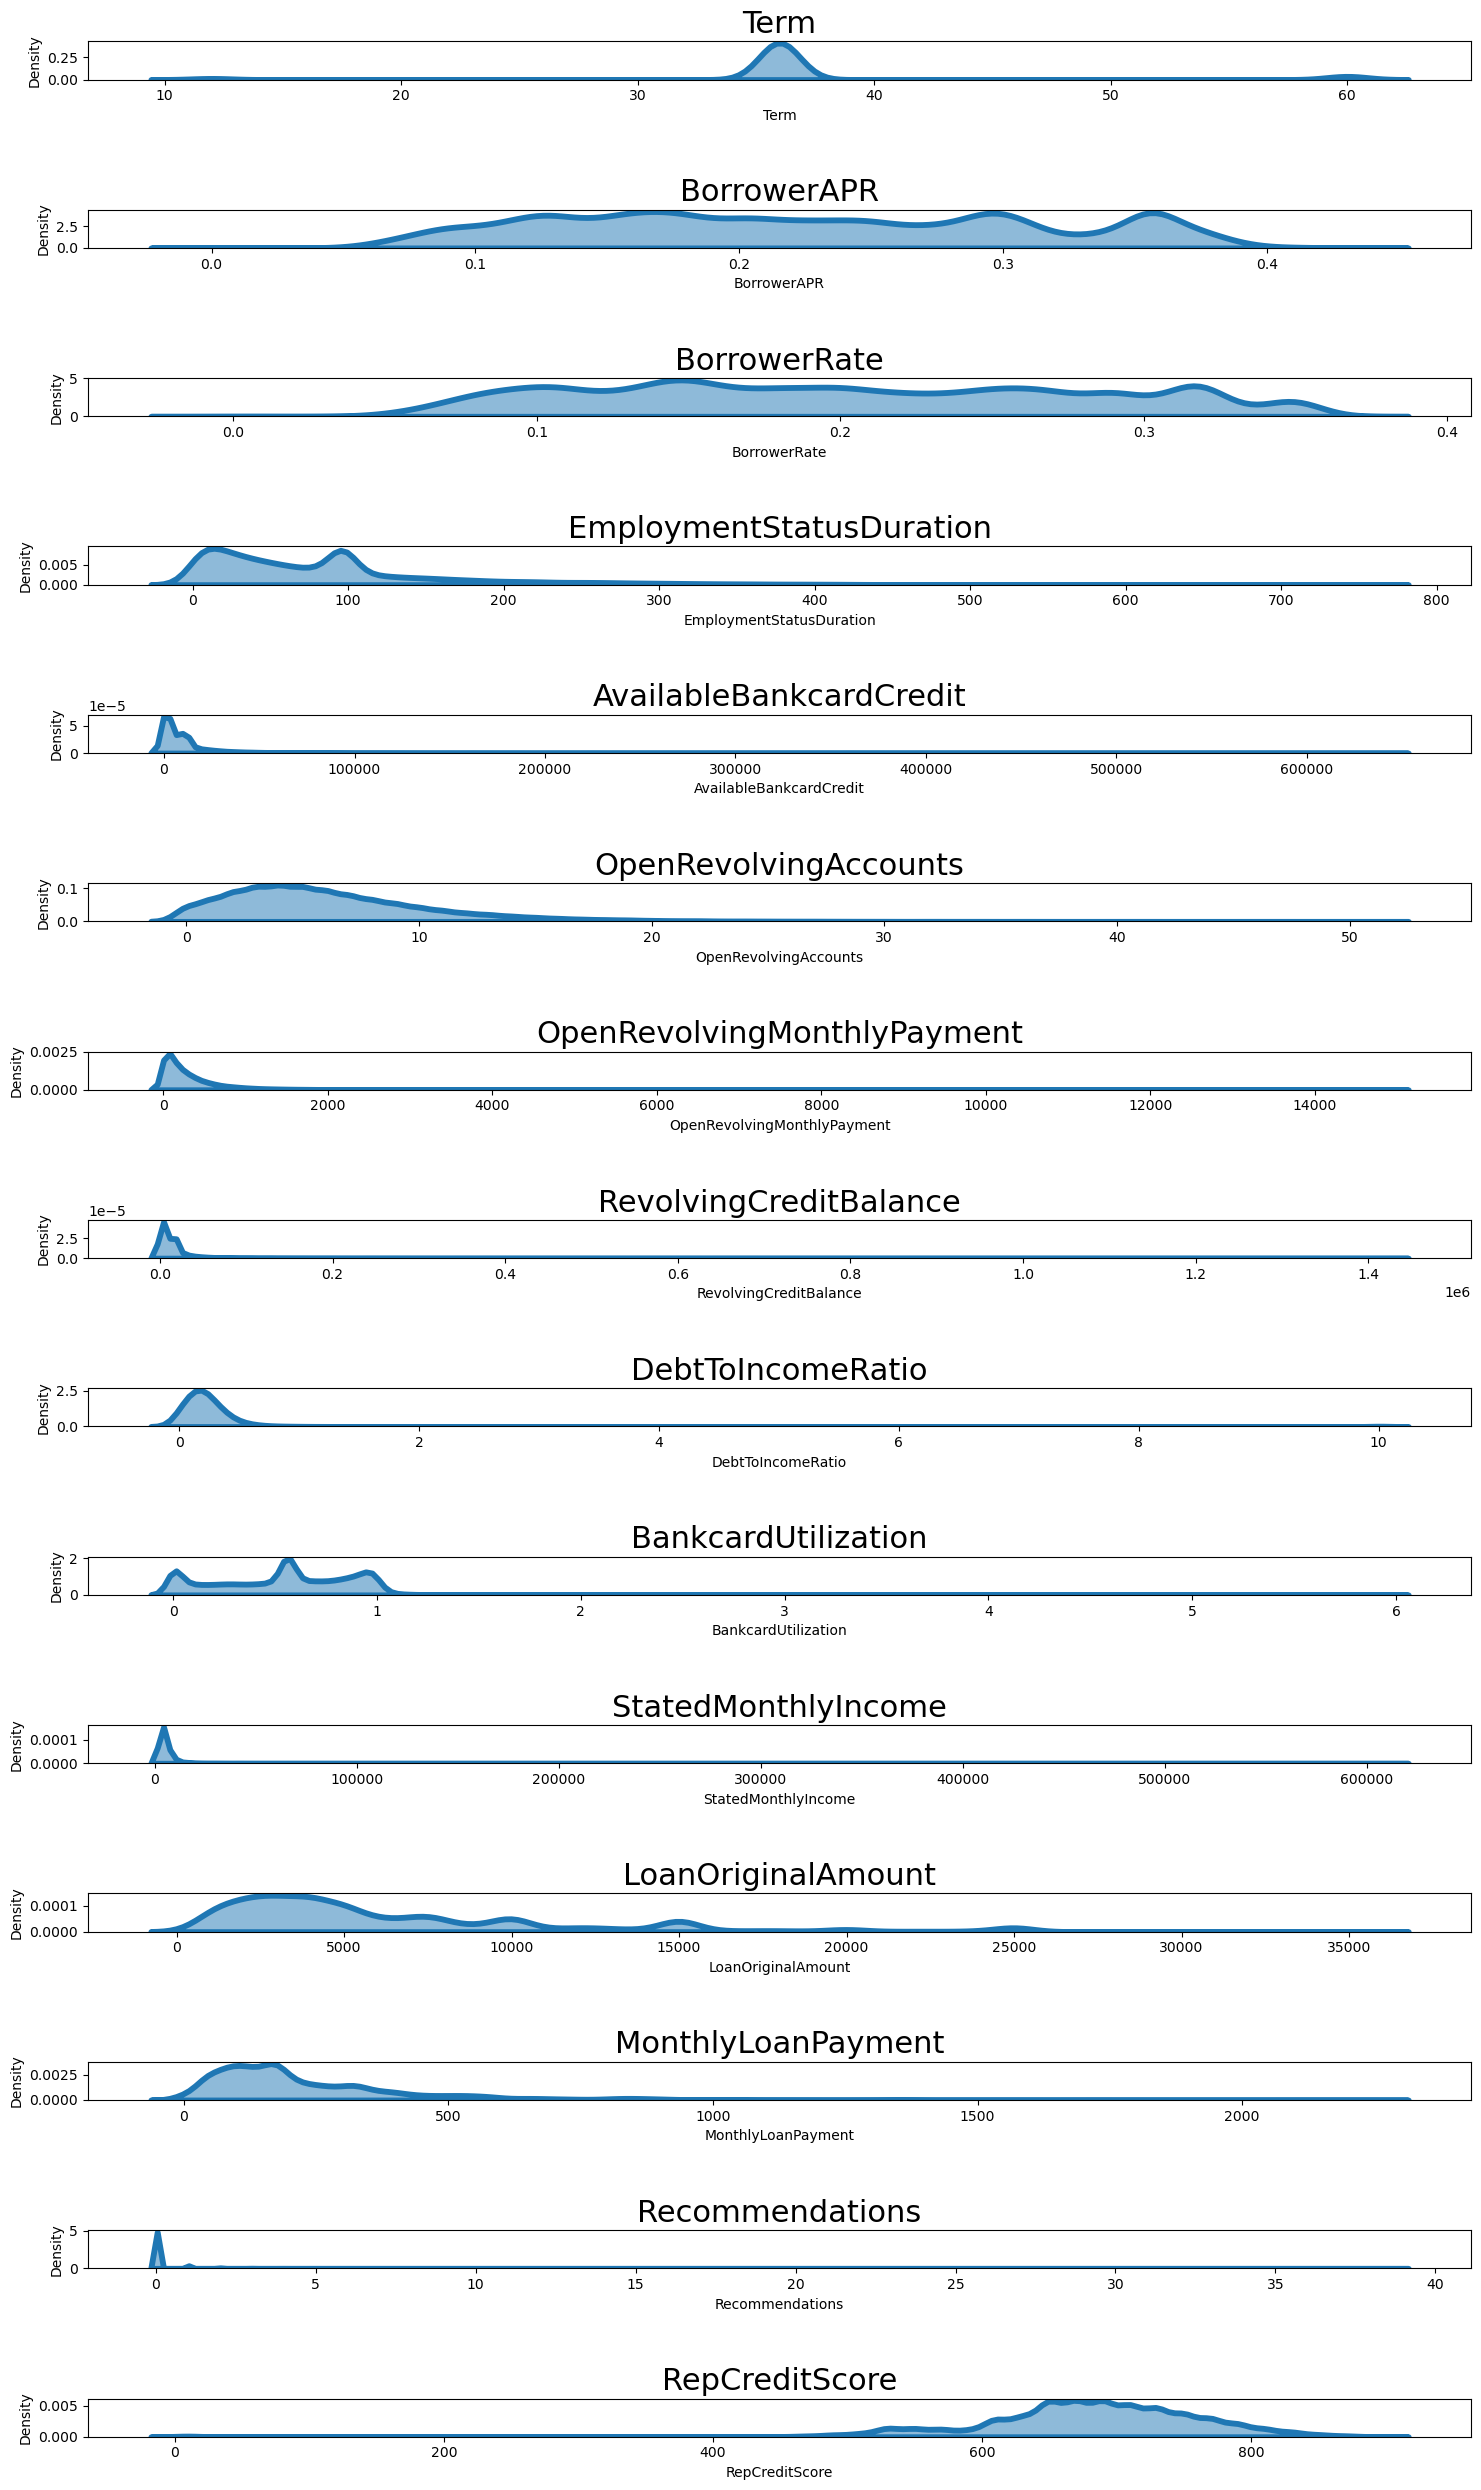

In [74]:
# Visualization Data Distribution
plt.figure(figsize=(15,25))
a = 1

for i in numeric:
    plt.subplot(15, 1, a)
    sb.kdeplot(df_copy[i], fill=True, alpha=0.5, linewidth=4.2)
    plt.title(i, fontsize=22)
    a += 1

plt.tight_layout(h_pad=4)
plt.show()


In [75]:
# Normal Test
for i in list(numeric.columns):
    stats, pval = normaltest(df_copy[i])
    if pval > 0.05:
        print(i, ': Normal distribution')
    else:
        print(i, ': Not normal distribution')

Term : Not normal distribution
BorrowerAPR : Not normal distribution
BorrowerRate : Not normal distribution
EmploymentStatusDuration : Not normal distribution
AvailableBankcardCredit : Not normal distribution
OpenRevolvingAccounts : Not normal distribution
OpenRevolvingMonthlyPayment : Not normal distribution
RevolvingCreditBalance : Not normal distribution
DebtToIncomeRatio : Not normal distribution
BankcardUtilization : Not normal distribution
StatedMonthlyIncome : Not normal distribution
LoanOriginalAmount : Not normal distribution
MonthlyLoanPayment : Not normal distribution
Recommendations : Not normal distribution
RepCreditScore : Not normal distribution


## Outlier Detection

### Interquartile Range

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categ

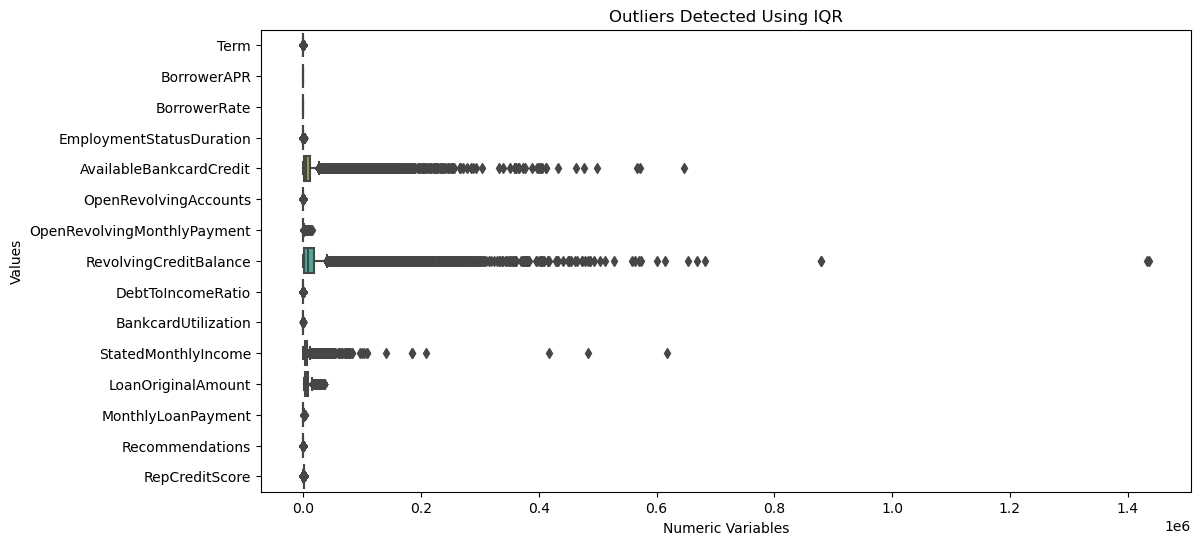

In [76]:
# Calculate IQR for each numeric column
Q1 = df_copy.select_dtypes(include=['int64', 'float64']).quantile(0.25)
Q3 = df_copy.select_dtypes(include=['int64', 'float64']).quantile(0.75)
IQR = Q3 - Q1

# Set lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using IQR method
outliers_iqr = ((df_copy.select_dtypes(include=['int64', 'float64']) < lower_bound) |
                (df_copy.select_dtypes(include=['int64', 'float64']) > upper_bound))

# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
sb.boxplot(data=df_copy.select_dtypes(include=['int64', 'float64']), orient='h')
plt.xlabel('Numeric Variables')
plt.ylabel('Values')
plt.title('Outliers Detected Using IQR')
plt.show()

# 'outliers_iqr' contains boolean values indicating outliers

### Grubbs Test

In [77]:
def find_outliers(selcted_variables):
    outliers = {}
    for column in selcted_variables.columns:
        # Check if the column contains numeric data
        if pd.api.types.is_numeric_dtype(selcted_variables[column]):
            numeric_data = selcted_variables[column].dropna().tolist()

            # Check if there are enough data points for the test
            num_elements = len(numeric_data)
            if num_elements < 3:
                outliers[column] = None  # Not enough data points for the test
                continue

            # Perform Grubbs' test
            z_scores = zscore(numeric_data)
            threshold = t.ppf(1 - 0.05 / (2 * num_elements), num_elements - 2)
            max_z_score = np.max(np.abs(z_scores))

            if max_z_score > threshold:
                # If an outlier is detected, find its index and value
                outlier_index = np.argmax(np.abs(z_scores))
                outlier_value = numeric_data[outlier_index]
                outliers[column] = outlier_value
            else:
                # No outliers detected for this column
                outliers[column] = None
        else:
            # Non-numeric column, ignore it
            outliers[column] = None
    return outliers

# Example usage with a pandas DataFrame named 'data'
# Replace 'data' with your actual DataFrame containing numeric and categorical columns
outliers = find_outliers(df_copy)

# Print the outliers detected for each numeric column
for column, outlier_value in outliers.items():
    if outlier_value is not None:
        print(f"Grubbs' test detected an outlier in column '{column}': {outlier_value}")
    else:
        print(f"No outliers detected in column '{column}'. ")

No outliers detected in column 'Term'. 
No outliers detected in column 'BorrowerAPR'. 
No outliers detected in column 'BorrowerRate'. 
No outliers detected in column 'ListingCategory'. 
No outliers detected in column 'EmploymentStatus'. 
Grubbs' test detected an outlier in column 'EmploymentStatusDuration': 755.0
No outliers detected in column 'IsBorrowerHomeowner'. 
Grubbs' test detected an outlier in column 'AvailableBankcardCredit': 646285.0
Grubbs' test detected an outlier in column 'OpenRevolvingAccounts': 51
Grubbs' test detected an outlier in column 'OpenRevolvingMonthlyPayment': 14985.0
Grubbs' test detected an outlier in column 'RevolvingCreditBalance': 1435667.0
Grubbs' test detected an outlier in column 'DebtToIncomeRatio': 10.01
Grubbs' test detected an outlier in column 'BankcardUtilization': 5.95
Grubbs' test detected an outlier in column 'StatedMonthlyIncome': 618547.833333
Grubbs' test detected an outlier in column 'LoanOriginalAmount': 35000
Grubbs' test detected an ou

Grubbs' test is a statistical hypothesis test that is effective for identifying single outliers in normally distributed data, whereas the IQR method is a rule-based approach suitable for detecting outliers in a wider range of data distributions and can identify both single and multiple outliers. The choice between these methods depends on the characteristics of your data and the goals of your analysis.

### Treat Extreme Outliers using IQR

In [78]:
df_copy['StatedMonthlyIncome'].value_counts().sort_index(ascending=False).head(4)

StatedMonthlyIncome
618547.833333    1
483333.333333    1
416666.666667    1
208333.333333    1
Name: count, dtype: int64

In [79]:
# Sort the DataFrame by 'Column2' in descending order
df_sorted = df_copy.sort_values(by='StatedMonthlyIncome', ascending=False)

df_sorted.head(3)

,Term,BorrowerAPR,BorrowerRate,ListingCategory,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,AvailableBankcardCredit,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,RevolvingCreditBalance,DebtToIncomeRatio,BankcardUtilization,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,RepCreditScore,LoanStatus
26308,12,0.25785,0.1795,Business,Self-employed,117.0,True,3091.0,6,154.0,5911.0,0.0,0.62,618547.833333,4000,366.62,0,729.5,Completed
8601,36,0.35643,0.3199,Debt Consolidation,Full-time,121.0,True,2114.0,2,312.0,12990.0,0.0,0.86,483333.333333,7500,326.62,0,669.5,Completed
3972,36,0.35643,0.3199,Debt Consolidation,Full-time,183.0,True,0.0,3,271.0,8560.0,0.0,0.00,416666.666667,2000,87.10,0,669.5,Completed


In [80]:
# # drop the extreme outliers
# df_copy.drop(index=[25640, 8405, 3873], inplace=True)

# # resest index
# df_copy = df_copy.reset_index(drop=True)


In [81]:
df_copy['AvailableBankcardCredit'].value_counts().sort_index(ascending=False).head(5)

AvailableBankcardCredit
646285.0    1
572427.0    1
566480.0    1
498374.0    1
477656.0    1
Name: count, dtype: int64

In [82]:
# Sort the DataFrame by 'Column2' in descending order
df_sorted = df_copy.sort_values(by='AvailableBankcardCredit', ascending=False)

df_sorted.head(10)


,Term,BorrowerAPR,BorrowerRate,ListingCategory,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,AvailableBankcardCredit,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,RevolvingCreditBalance,DebtToIncomeRatio,BankcardUtilization,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,RepCreditScore,LoanStatus
12307,36,0.09223,0.0750,Not Available,Full-time,88.0,True,646285.0,32,1806.0,46165.0,0.00,0.06,0.000000,1000,31.11,0,789.5,Completed
46531,36,0.16506,0.1579,Business,Retired,96.0,True,572427.0,32,1986.0,349373.0,0.17,0.37,10000.000000,25000,876.34,0,789.5,Completed
52450,36,0.07607,0.0590,Business,Full-time,32.0,True,566480.0,16,678.0,86680.0,0.05,0.13,33333.333333,1000,30.38,0,849.5,Completed
39845,36,0.06828,0.0649,Debt Consolidation,Full-time,93.0,True,498374.0,9,1525.0,191762.0,0.15,0.27,15666.666667,22000,674.18,0,809.5,Not Completed
19793,36,0.08605,0.0775,Not Available,Full-time,297.0,True,477656.0,18,439.0,32935.0,0.05,0.06,10833.333333,2000,62.44,0,849.5,Completed
19147,36,0.08102,0.0639,Personal,Retired,29.0,True,463575.0,4,112.0,6425.0,0.00,0.01,0.000000,1000,30.60,0,829.5,Completed
45795,36,0.09333,0.0799,Debt Consolidation,Full-time,7.0,True,432613.0,10,1761.0,258125.0,0.22,0.36,16666.666667,10400,325.85,0,769.5,Not Completed
19764,36,0.08704,0.0802,Other,Self-employed,30.0,True,413072.0,5,436.0,76928.0,0.06,0.15,13333.333333,3000,94.04,0,809.5,Completed
49412,36,0.30532,0.2699,Other,Self-employed,3.0,False,412785.0,9,465.0,12856.0,0.00,0.02,2685.416667,6000,244.92,0,669.5,Completed
32013,36,0.11766,0.0899,Business,Full-time,142.0,False,406125.0,4,603.0,47796.0,0.17,0.10,6000.000000,8000,254.36,0,749.5,Completed


In [83]:
# # drop the extreme outliers
# df_copy.drop(index=[12442,19341], inplace=True)

# # resest index
# df_copy = df_copy.reset_index(drop=True)


### Categorical Columns

In [84]:
def create_countplot(data, column_name):
    plt.figure(figsize=(6, 5))  # Adjust the figure size as needed
    sb.countplot(data=data, x=column_name, palette='Set2')  # You can change the palette as desired
    plt.title(f'Countplot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels if needed for readability
    plt.show()

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


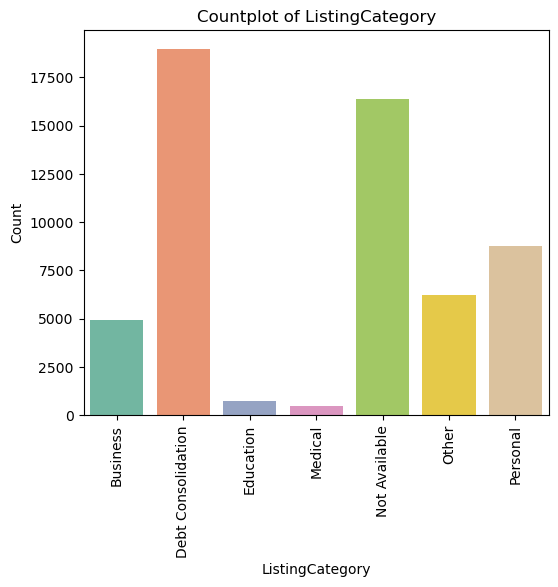

In [85]:
create_countplot(df_copy, 'ListingCategory')

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


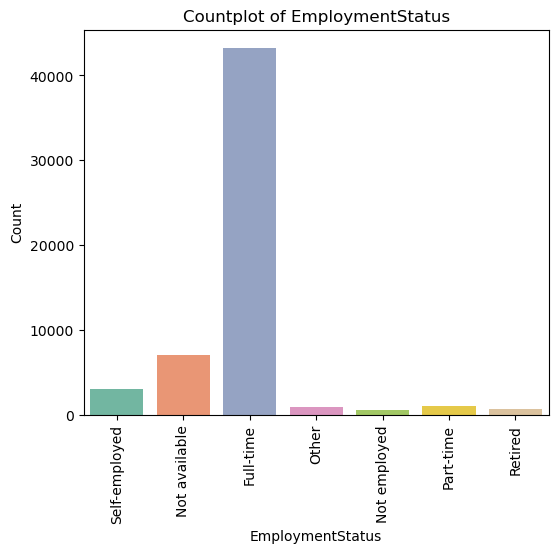

In [86]:
create_countplot(df_copy, 'EmploymentStatus')

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


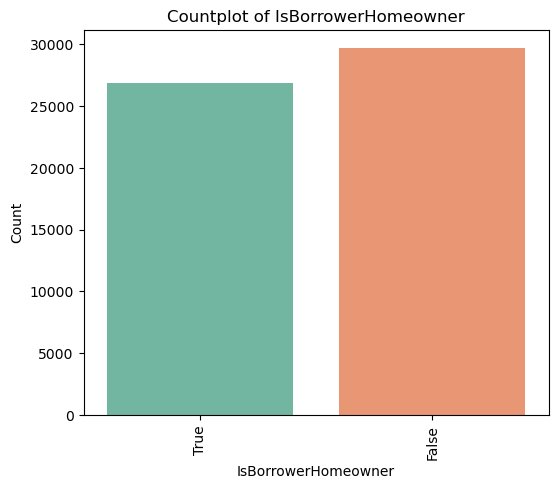

In [87]:
create_countplot(df_copy, 'IsBorrowerHomeowner')

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


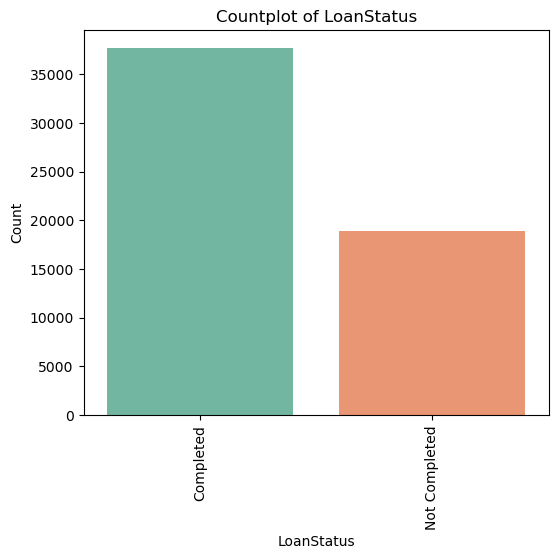

In [88]:
create_countplot(df_copy, 'LoanStatus')

### Bivariate Analysis

## Data Transformation


In [89]:
df_imbalanced = df_copy.copy()

### Label Encoding for the Target Variable (Loan Status)

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


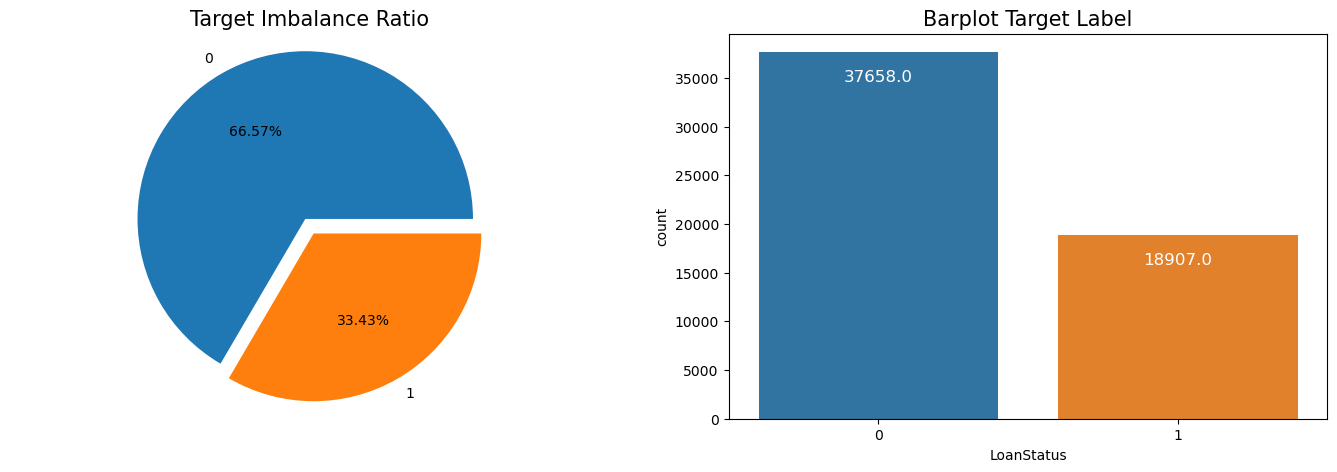

In [90]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'LoanStatus' column
df_imbalanced['LoanStatus'] = label_encoder.fit_transform(df_imbalanced['LoanStatus'])

plt.figure(figsize=(17,(100)/20))

plt.subplot(121)
plt.pie(round(df_imbalanced['LoanStatus'].value_counts()/len(df_imbalanced)*100,2),labels=list(df_imbalanced['LoanStatus'].value_counts().index),autopct = "%.2f%%",explode = (0,0.1))
plt.axis("equal")
plt.title("Target Imbalance Ratio",size=15)

plt.subplot(122)
ax = sb.countplot(data=df_imbalanced, x='LoanStatus')
plt.title("Barplot Target Label", fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=12)

In [91]:
loan_status = df_imbalanced['LoanStatus']
loan_status.value_counts()

LoanStatus
0    37658
1    18907
Name: count, dtype: int64

### Onehot coding for categorical variables

In [92]:
cat.columns

Index(['ListingCategory', 'EmploymentStatus', 'IsBorrowerHomeowner',
       'LoanStatus'],
      dtype='object')

In [93]:
onehot_columns = ['ListingCategory', 'EmploymentStatus', 'IsBorrowerHomeowner']
def onehot_encode(df,columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df,dummies], axis=1)
        df.drop(column, axis=1,inplace= True)
    return df

In [94]:
df_imbalanced = onehot_encode(df_imbalanced,onehot_columns)

#df_imbalanced = pd.concat([numeric,df_imbalanced],axis = 1)
df_imbalanced

,Term,BorrowerAPR,BorrowerRate,EmploymentStatusDuration,AvailableBankcardCredit,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,RevolvingCreditBalance,DebtToIncomeRatio,BankcardUtilization,...,Personal,Full-time,Not available,Not employed,Other,Part-time,Retired,Self-employed,False,True
0,36,0.16516,0.1580,2.000000,1500.000000,1,24.0,0.000000,0.17,0.000000,...,False,False,False,False,False,False,False,True,False,True
1,36,0.28269,0.2750,96.071582,11210.225447,0,0.0,17598.706751,0.06,0.561309,...,False,False,True,False,False,False,False,False,True,False
2,36,0.15033,0.1325,19.000000,2580.000000,1,40.0,1220.000000,0.27,0.320000,...,False,True,False,False,False,False,False,False,True,False
3,36,0.17969,0.1435,1.000000,3626.000000,8,290.0,8624.000000,0.18,0.700000,...,False,True,False,False,False,False,False,False,True,False
4,36,0.35797,0.3177,121.000000,178.000000,5,300.0,9103.000000,0.49,0.970000,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56560,36,0.29776,0.2900,96.071582,11210.225447,0,0.0,17598.706751,0.07,0.561309,...,False,False,True,False,False,False,False,False,True,False
56561,36,0.07469,0.0679,69.000000,34415.000000,7,763.0,89961.000000,0.06,0.720000,...,True,True,False,False,False,False,False,False,False,True
56562,36,0.22362,0.1899,22.000000,3746.000000,2,7.0,4.000000,0.27,0.000000,...,False,True,False,False,False,False,False,False,True,False
56563,36,0.30285,0.2639,25.000000,7537.000000,7,135.0,1109.000000,0.05,0.110000,...,True,True,False,False,False,False,False,False,True,False


In [95]:
df_imbalanced.columns

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'EmploymentStatusDuration',
       'AvailableBankcardCredit', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'RevolvingCreditBalance',
       'DebtToIncomeRatio', 'BankcardUtilization', 'StatedMonthlyIncome',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'Recommendations',
       'RepCreditScore', 'LoanStatus', 'Business', 'Debt Consolidation',
       'Education', 'Medical', 'Not Available', 'Other', 'Personal',
       'Full-time', 'Not available', 'Not employed', 'Other', 'Part-time',
       'Retired', 'Self-employed', 'False', 'True'],
      dtype='object')

### Split Dataset

In [96]:
X = df_imbalanced.drop("LoanStatus",axis= 1)
y = df_imbalanced["LoanStatus"]

# Split the data into training (80%) and the rest (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Standardize the features using the RobustScaler.
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
# check if the stratified sampling method works by calculating the percentage of the not_completed class
print('Percentage of Charged Off label in y_train: ', round(sum(y_train)/len(y_train)*100, 2), '%')

Percentage of Charged Off label in y_train:  33.43 %


In [98]:
# Size of data samples
print('Independent training size (X_train):', X_train.shape)
print('Dependent training size (y_train):', y_train.shape)
print('Independent testing size (X_test):', X_test.shape)
print('Dependent testing size (y_train):', y_test.shape)

Independent training size (X_train): (45252, 31)
Dependent training size (y_train): (45252,)
Independent testing size (X_test): (11313, 31)
Dependent testing size (y_train): (11313,)


## Classification Tasks


In [99]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier


In [100]:
# Assuming you have a DataFrame to store the model evaluations
model_evaluations_df = pd.DataFrame(columns=['Model', 'Train Score', 'Accuracy Score', 'F1 Score', 'Precision Score',
                                             'Recall Score', 'AUC Score'])

def evaluate_model(X_train, y_train, X_test, y_test, model, model_name):
    
    # Train the provided model
    model.fit(X_train, y_train)
    
    # Make predictions on the train set
    train_pred = model.predict(X_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Evaluate the model
    train_score = round(model.score(X_train, y_train), 4)
    accuracy = round(accuracy_score(y_test, predictions), 4)
    f1 = round(f1_score(y_test, predictions), 4)
    precision = round(precision_score(y_test, predictions), 4)
    recall = round(recall_score(y_test, predictions), 4)
    auc = round(roc_auc_score(y_test, predictions), 4)
    
    # Print and return evaluation metrics
    print("Model Evaluation", model_name)

    evaluation_dict = {
        'Model': model_name,
        'Train Score': train_score,
        'Accuracy Score': accuracy,
        'F1 Score': f1,
        'Precision Score': precision,
        'Recall Score': recall,
        'AUC Score': auc
    }
    
    # Print Classification Report
    print("\nClassification Report: Train")
    print(classification_report(y_train, train_pred))
    
    print("\nClassification Report: Test")
    print(classification_report(y_test, predictions))
    

    # Plot Confusion Matrix
    # Generate Confusion Matrices
    conf_matrix_train = confusion_matrix(y_train, train_pred)
    conf_matrix_test = confusion_matrix(y_test, predictions)
    # Plot Subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
    # Subplot for Training Set
    disp_train = ConfusionMatrixDisplay(conf_matrix_train, display_labels=['Class 0', 'Class 1'])
    disp_train.plot(values_format='d', ax=axes[0])
    axes[0].set_title('Confusion Matrix - Training Set')
    # Subplot for Test Set
    disp_test = ConfusionMatrixDisplay(conf_matrix_test, display_labels=['Class 0', 'Class 1'])
    disp_test.plot(cmap='Blues', values_format='d', ax=axes[1])
    axes[1].set_title('Confusion Matrix - Test Set')
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

    # Plot roc-auc Curve
    # Get predicted probabilities for the positive class
    y_scores_train = model.predict_proba(X_train)[:, 1]
    y_scores_test = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_scores_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)

    # Calculate the area under the ROC curve (AUC)
    roc_auc_train = roc_auc_score(y_train, y_scores_train)
    roc_auc_test = roc_auc_score(y_test, y_scores_test)

    # Plot Subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Subplot for Training Set
    axes[0].plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'AUC = {roc_auc_train:.2f}')
    axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title(f'ROC Curve - Training Set ({model_name})')
    axes[0].legend(loc='lower right')

    # Subplot for Test Set
    axes[1].plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title(f'ROC Curve - Test Set ({model_name})')
    axes[1].legend(loc='lower right')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()
    
    return evaluation_dict




Models
- Random forest
- Baging estimator with decision trees
- stacked classifier
- voting classifier
- Adaboost
- gradient boosting

### Imbalanced and Non Scaled Random Forest

Model Evaluation Imbalanced and Non Scaled Random Forest

Classification Report: Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30126
           1       1.00      1.00      1.00     15126

    accuracy                           1.00     45252
   macro avg       1.00      1.00      1.00     45252
weighted avg       1.00      1.00      1.00     45252


Classification Report: Test
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      7532
           1       0.62      0.36      0.45      3781

    accuracy                           0.71     11313
   macro avg       0.68      0.62      0.63     11313
weighted avg       0.70      0.71      0.69     11313



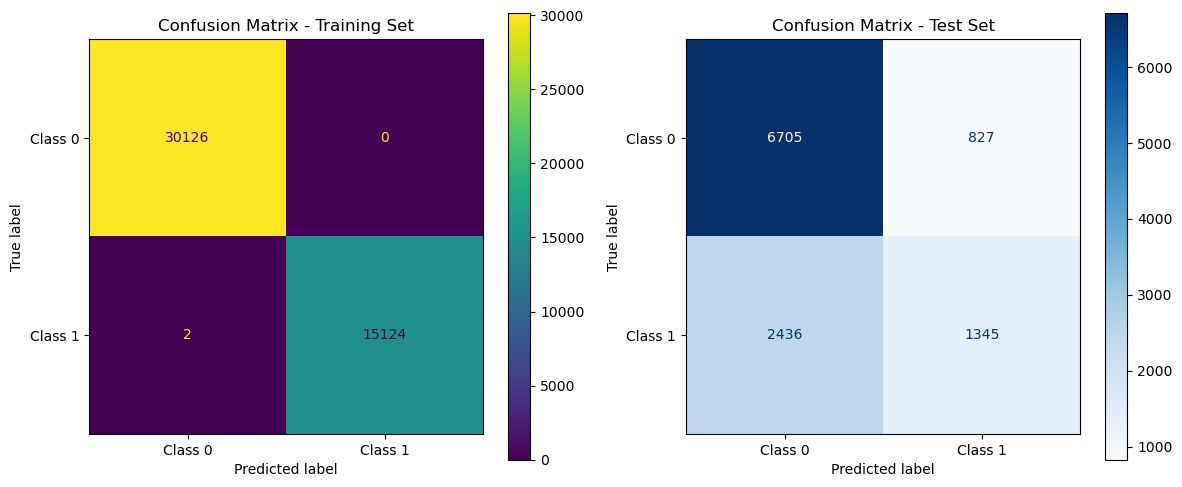

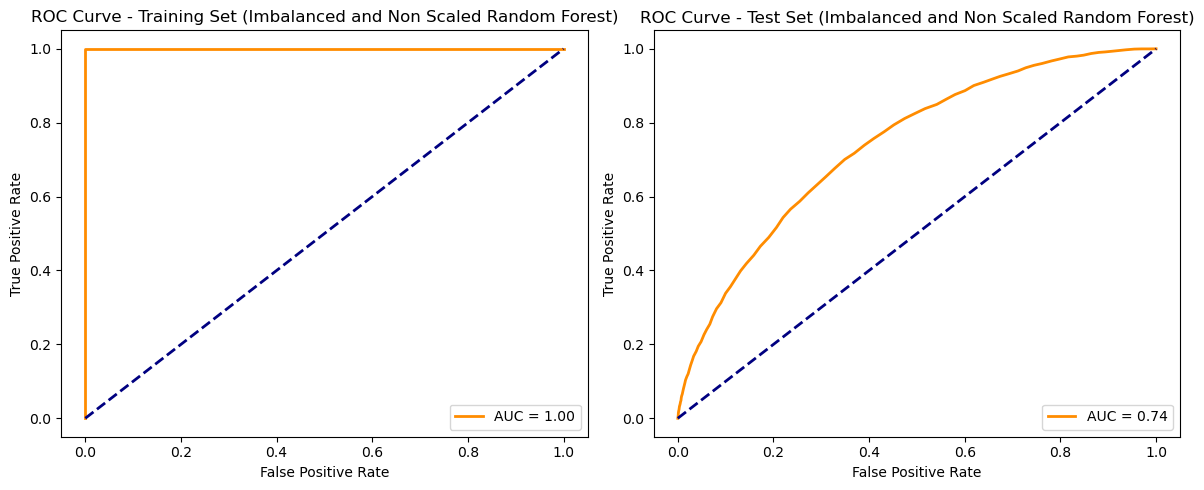

{'Model': 'Imbalanced and Non Scaled Random Forest',
 'Train Score': 1.0,
 'Accuracy Score': 0.7116,
 'F1 Score': 0.4519,
 'Precision Score': 0.6192,
 'Recall Score': 0.3557,
 'AUC Score': 0.623}

In [101]:
ns_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluation_ns_rf_model = evaluate_model(X_train, y_train, X_test, y_test, ns_rf_model, 'Imbalanced and Non Scaled Random Forest')
evaluation_ns_rf_model

### Imbalanced and Non Scaled Gradient Boosting

Model Evaluation Imbalanced and Non Scaled Gradient Boosting

Classification Report: Train
              precision    recall  f1-score   support

           0       0.73      0.91      0.81     30126
           1       0.65      0.33      0.44     15126

    accuracy                           0.72     45252
   macro avg       0.69      0.62      0.62     45252
weighted avg       0.70      0.72      0.69     45252


Classification Report: Test
              precision    recall  f1-score   support

           0       0.73      0.91      0.81      7532
           1       0.64      0.33      0.43      3781

    accuracy                           0.71     11313
   macro avg       0.68      0.62      0.62     11313
weighted avg       0.70      0.71      0.68     11313



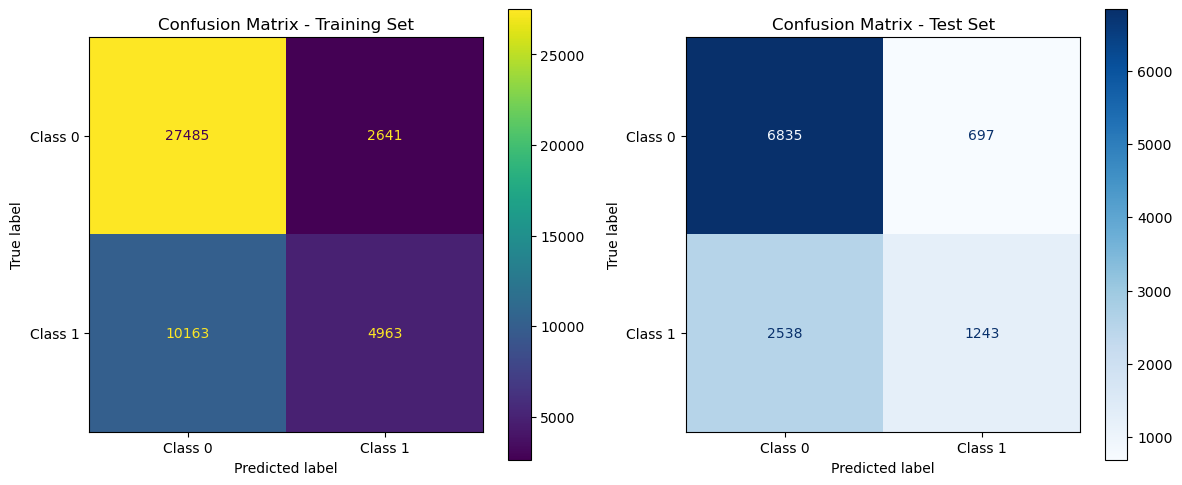

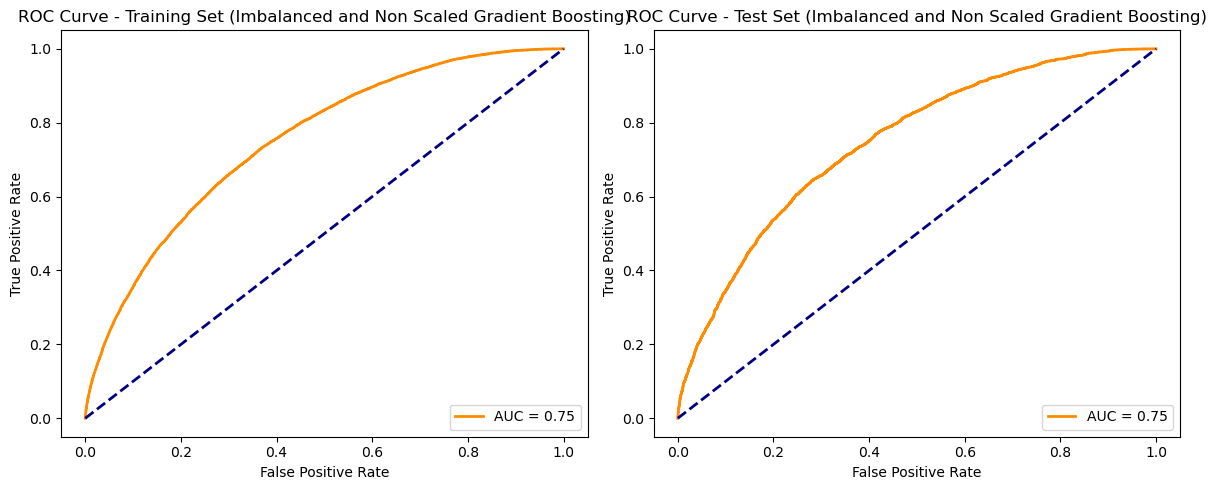

{'Model': 'Imbalanced and Non Scaled Gradient Boosting',
 'Train Score': 0.7171,
 'Accuracy Score': 0.714,
 'F1 Score': 0.4345,
 'Precision Score': 0.6407,
 'Recall Score': 0.3287,
 'AUC Score': 0.6181}

In [102]:
ns_gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
evaluation_ns_gb_model = evaluate_model(X_train, y_train, X_test, y_test, ns_gb_model, 'Imbalanced and Non Scaled Gradient Boosting')
evaluation_ns_gb_model

### Imbalanced and Non Scaled Bagging Meta-Estimator (using Decision Trees)

Model Evaluation Imbalanced and Non Scaled Bagging Meta-Estimator

Classification Report: Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30126
           1       1.00      1.00      1.00     15126

    accuracy                           1.00     45252
   macro avg       1.00      1.00      1.00     45252
weighted avg       1.00      1.00      1.00     45252


Classification Report: Test
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      7532
           1       0.59      0.38      0.46      3781

    accuracy                           0.71     11313
   macro avg       0.66      0.62      0.63     11313
weighted avg       0.69      0.71      0.69     11313



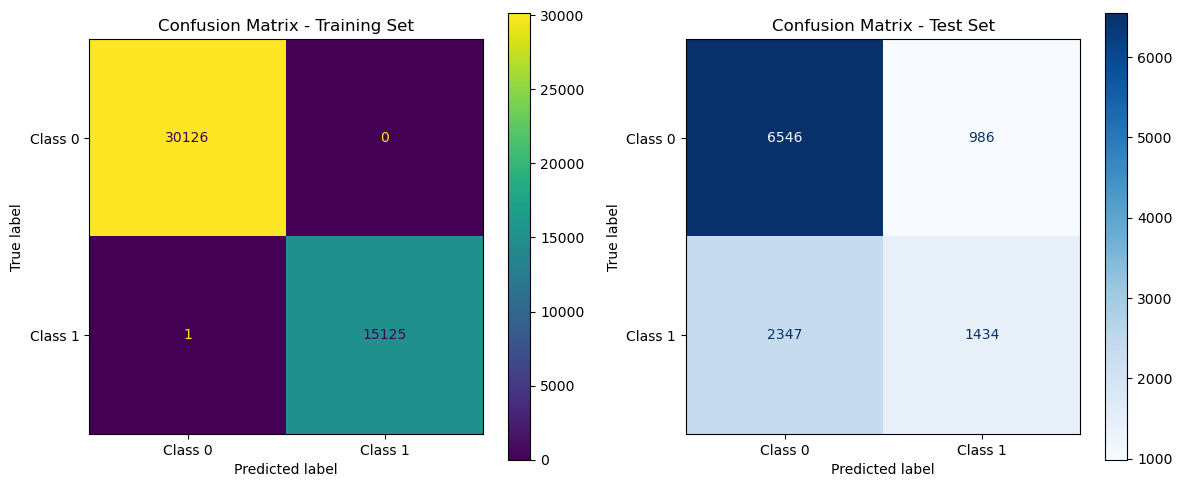

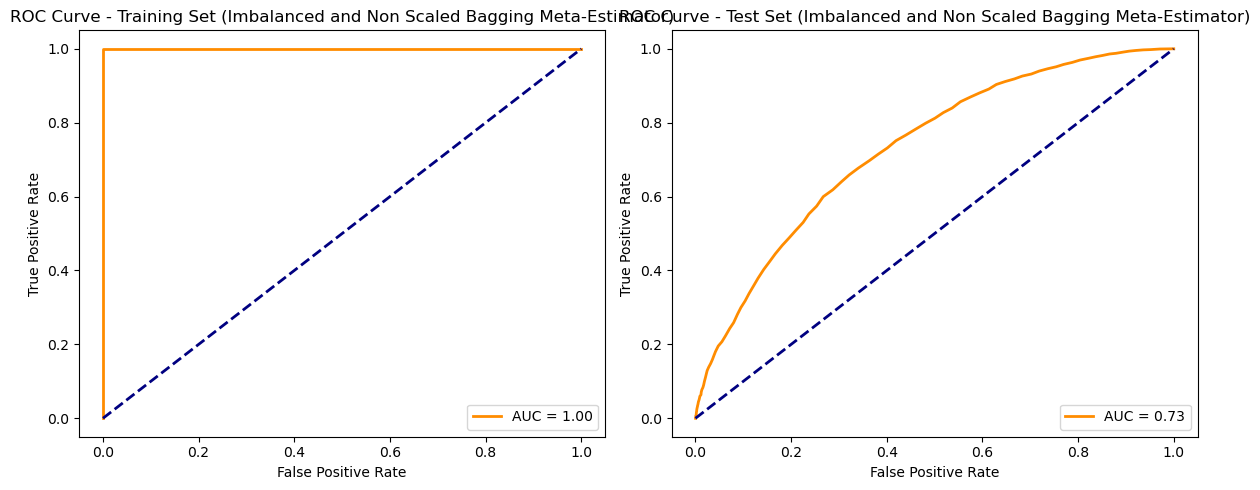

{'Model': 'Imbalanced and Non Scaled Bagging Meta-Estimator',
 'Train Score': 1.0,
 'Accuracy Score': 0.7054,
 'F1 Score': 0.4625,
 'Precision Score': 0.5926,
 'Recall Score': 0.3793,
 'AUC Score': 0.6242}

In [103]:
ns_bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
evaluation_ns_bagging_model = evaluate_model(X_train, y_train, X_test, y_test, ns_bagging_model, 'Imbalanced and Non Scaled Bagging Meta-Estimator')
evaluation_ns_bagging_model

### Imbalanced and Non Scaled Voting Classifier

Model Evaluation Imbalanced and Non Scaled Voting Classifier

Classification Report: Train
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30126
           1       1.00      0.97      0.98     15126

    accuracy                           0.99     45252
   macro avg       0.99      0.98      0.99     45252
weighted avg       0.99      0.99      0.99     45252


Classification Report: Test
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      7532
           1       0.63      0.36      0.46      3781

    accuracy                           0.71     11313
   macro avg       0.68      0.63      0.63     11313
weighted avg       0.70      0.71      0.69     11313



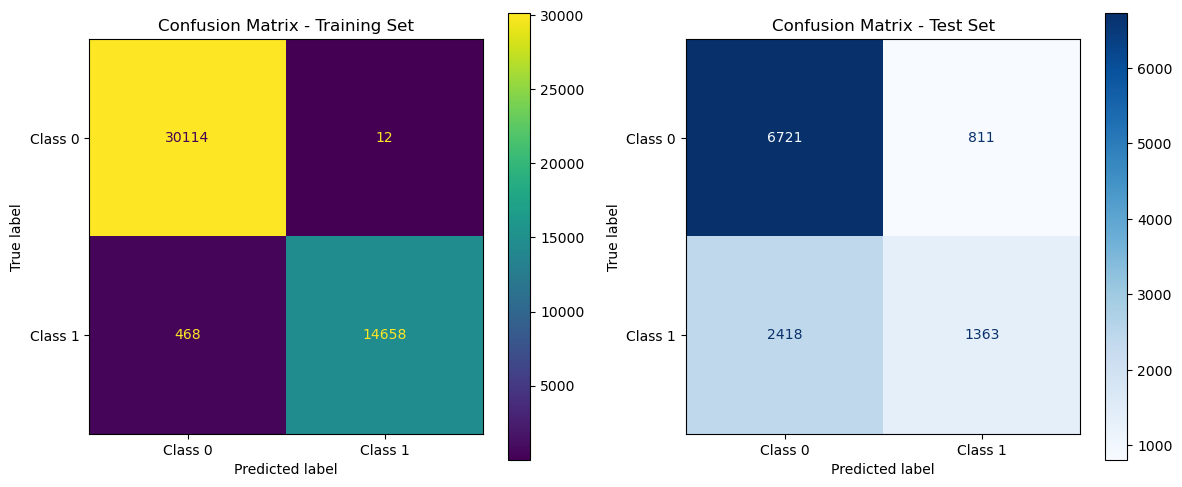

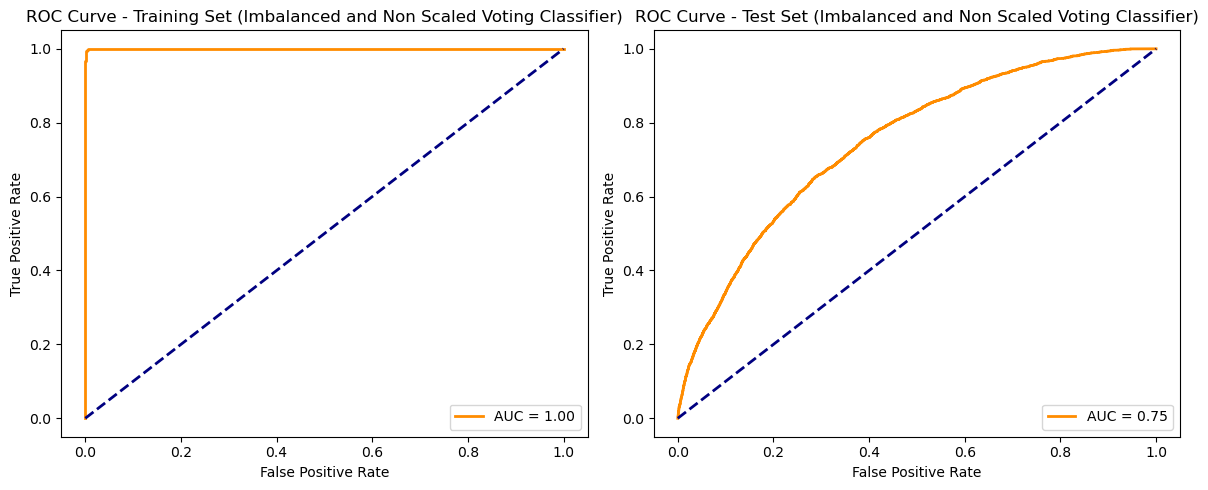

{'Model': 'Imbalanced and Non Scaled Voting Classifier',
 'Train Score': 0.9894,
 'Accuracy Score': 0.7146,
 'F1 Score': 0.4578,
 'Precision Score': 0.627,
 'Recall Score': 0.3605,
 'AUC Score': 0.6264}

In [104]:
ns_voting_model = VotingClassifier(estimators=[('rf', ns_rf_model), ('gb', ns_gb_model), ('bagging', ns_bagging_model)], voting='soft')
evaluation_ns_voting_model = evaluate_model(X_train, y_train, X_test, y_test, ns_voting_model, 'Imbalanced and Non Scaled Voting Classifier')
evaluation_ns_voting_model

### Imbalanced and Scaled Random Forest

Model Evaluation Imbalanced and Scaled Random Forest

Classification Report: Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30126
           1       1.00      1.00      1.00     15126

    accuracy                           1.00     45252
   macro avg       1.00      1.00      1.00     45252
weighted avg       1.00      1.00      1.00     45252


Classification Report: Test
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      7532
           1       0.62      0.36      0.45      3781

    accuracy                           0.71     11313
   macro avg       0.68      0.62      0.63     11313
weighted avg       0.69      0.71      0.69     11313



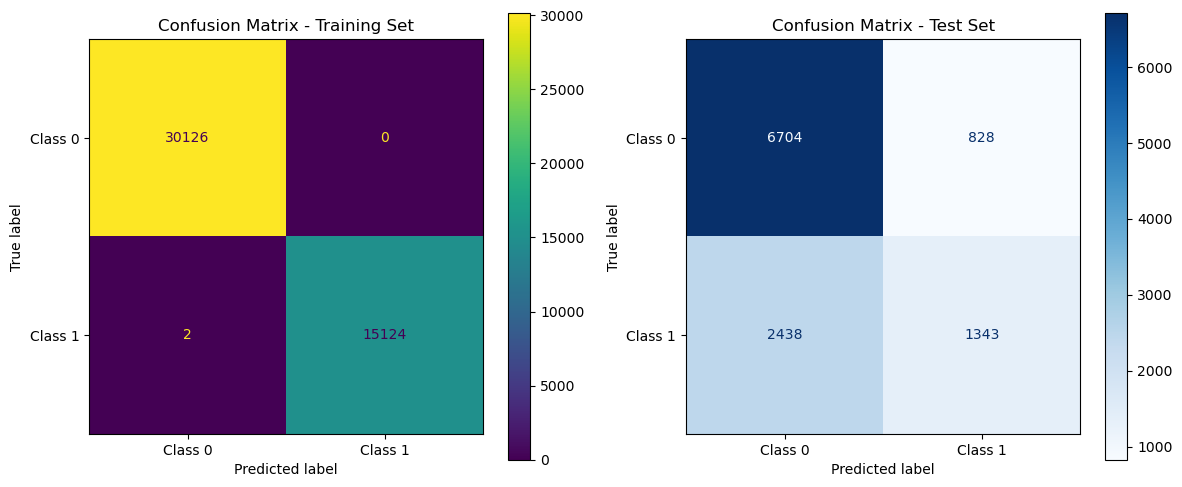

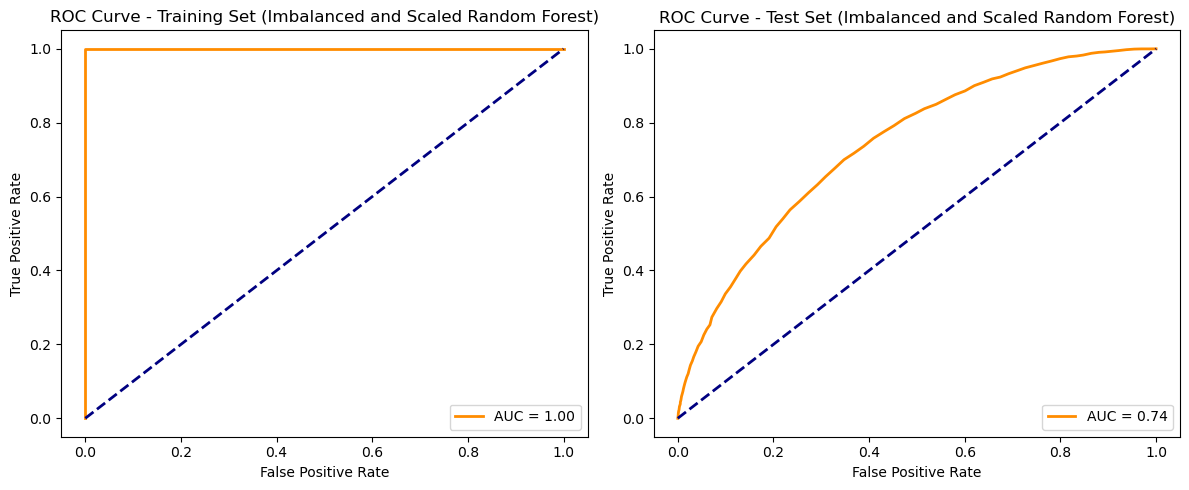

{'Model': 'Imbalanced and Scaled Random Forest',
 'Train Score': 1.0,
 'Accuracy Score': 0.7113,
 'F1 Score': 0.4513,
 'Precision Score': 0.6186,
 'Recall Score': 0.3552,
 'AUC Score': 0.6226}

In [105]:
is_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluation_is_rf_model = evaluate_model(X_train_scaled, y_train, X_test_scaled, y_test, is_rf_model, 'Imbalanced and Scaled Random Forest')
evaluation_is_rf_model

### Imbalanced and Scaled Gradient Boosting

Model Evaluation Imbalanced and Scaled Gradient Boosting

Classification Report: Train
              precision    recall  f1-score   support

           0       0.73      0.91      0.81     30126
           1       0.65      0.33      0.44     15126

    accuracy                           0.72     45252
   macro avg       0.69      0.62      0.62     45252
weighted avg       0.70      0.72      0.69     45252


Classification Report: Test
              precision    recall  f1-score   support

           0       0.73      0.91      0.81      7532
           1       0.64      0.33      0.43      3781

    accuracy                           0.71     11313
   macro avg       0.68      0.62      0.62     11313
weighted avg       0.70      0.71      0.68     11313



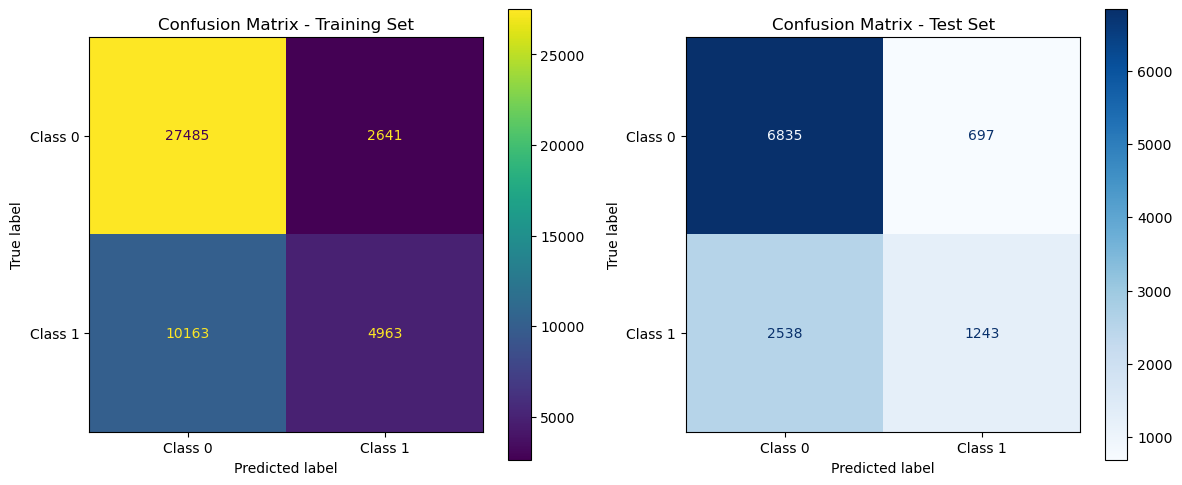

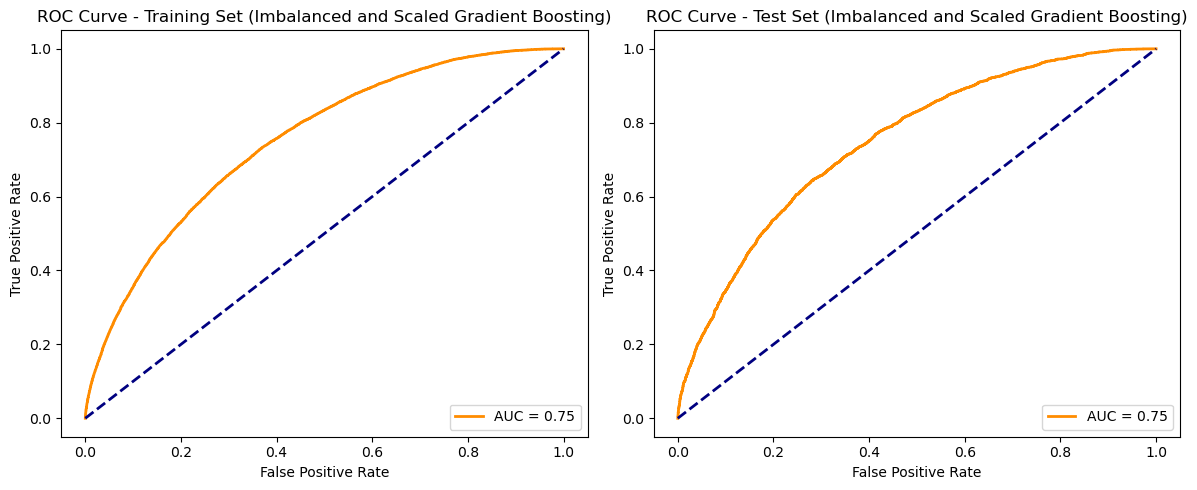

{'Model': 'Imbalanced and Scaled Gradient Boosting',
 'Train Score': 0.7171,
 'Accuracy Score': 0.714,
 'F1 Score': 0.4345,
 'Precision Score': 0.6407,
 'Recall Score': 0.3287,
 'AUC Score': 0.6181}

In [106]:
is_gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
evaluation_is_gb_model = evaluate_model(X_train_scaled, y_train, X_test_scaled, y_test, is_gb_model, 'Imbalanced and Scaled Gradient Boosting')
evaluation_is_gb_model

In [107]:
evaluation_dicts = [evaluation_ns_rf_model, evaluation_ns_gb_model, evaluation_ns_bagging_model, evaluation_ns_voting_model, evaluation_is_rf_model,evaluation_is_gb_model]


# Convert the list of dictionaries to a DataFrame
evaluation_df = pd.DataFrame(evaluation_dicts)

# Display the DataFrame
evaluation_df

,Model,Train Score,Accuracy Score,F1 Score,Precision Score,Recall Score,AUC Score
0,Imbalanced and Non Scaled Random Forest,1.0000,0.7116,0.4519,0.6192,0.3557,0.6230
1,Imbalanced and Non Scaled Gradient Boosting,0.7171,0.7140,0.4345,0.6407,0.3287,0.6181
2,Imbalanced and Non Scaled Bagging Meta-Estimator,1.0000,0.7054,0.4625,0.5926,0.3793,0.6242
3,Imbalanced and Non Scaled Voting Classifier,0.9894,0.7146,0.4578,0.6270,0.3605,0.6264
4,Imbalanced and Scaled Random Forest,1.0000,0.7113,0.4513,0.6186,0.3552,0.6226
5,Imbalanced and Scaled Gradient Boosting,0.7171,0.7140,0.4345,0.6407,0.3287,0.6181


### Imbalanced and Scaled Bagging Meta-Estimator (using Decision Trees)

Model Evaluation Imbalanced and Scaled Bagging Meta-Estimator

Classification Report: Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30126
           1       1.00      1.00      1.00     15126

    accuracy                           1.00     45252
   macro avg       1.00      1.00      1.00     45252
weighted avg       1.00      1.00      1.00     45252


Classification Report: Test
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      7532
           1       0.59      0.38      0.46      3781

    accuracy                           0.71     11313
   macro avg       0.66      0.62      0.63     11313
weighted avg       0.69      0.71      0.69     11313



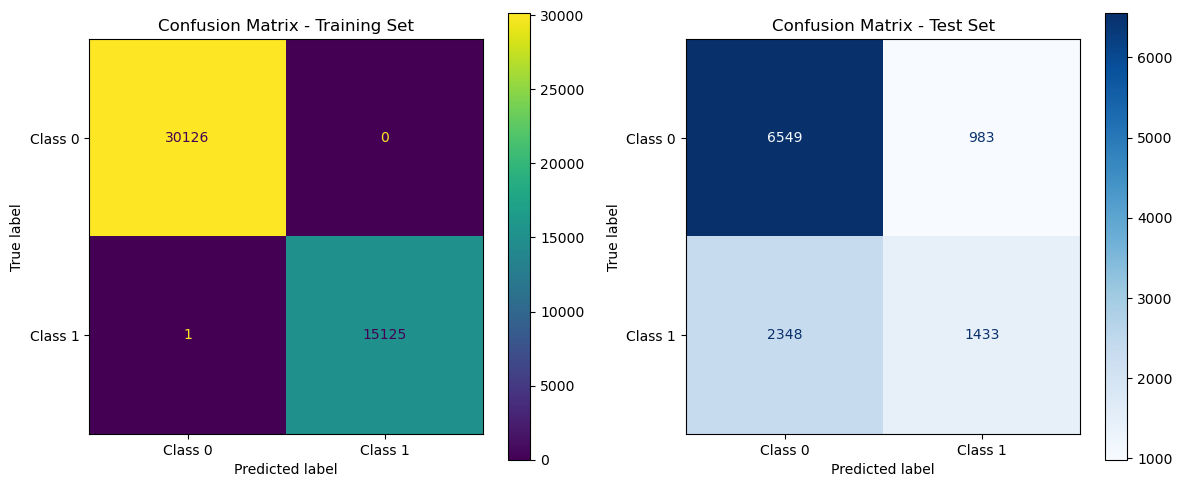

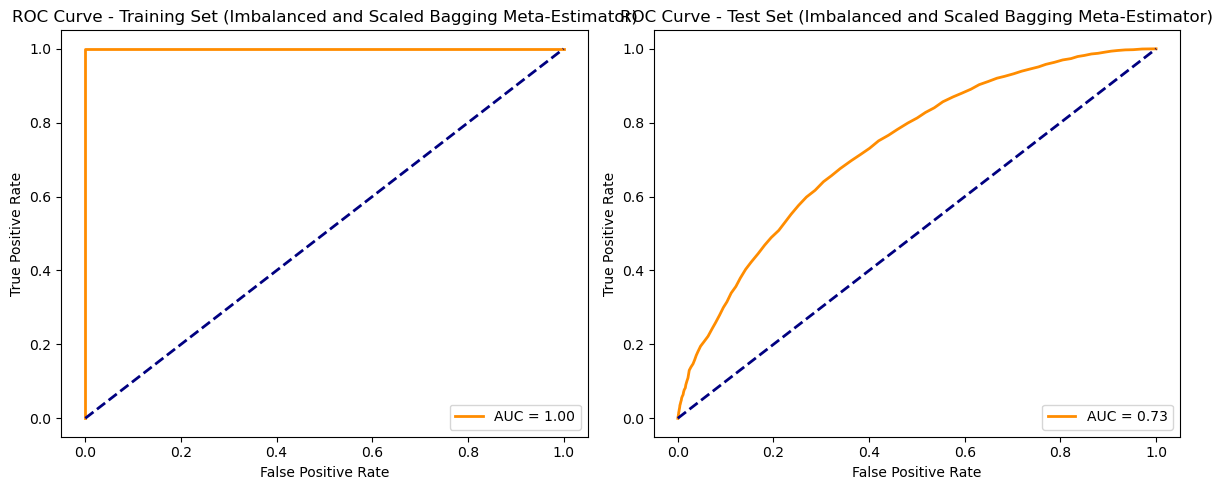

{'Model': 'Imbalanced and Scaled Bagging Meta-Estimator',
 'Train Score': 1.0,
 'Accuracy Score': 0.7056,
 'F1 Score': 0.4625,
 'Precision Score': 0.5931,
 'Recall Score': 0.379,
 'AUC Score': 0.6242}

In [108]:
is_bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
evaluation_is_bagging_model = evaluate_model(X_train_scaled, y_train, X_test_scaled, y_test, is_bagging_model, 'Imbalanced and Scaled Bagging Meta-Estimator')
evaluation_is_bagging_model

### Imbalanced and Scaled Voting Classifier

Model Evaluation Imbalanced and Scaled Voting Classifier

Classification Report: Train
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30126
           1       1.00      0.97      0.98     15126

    accuracy                           0.99     45252
   macro avg       0.99      0.98      0.99     45252
weighted avg       0.99      0.99      0.99     45252


Classification Report: Test
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      7532
           1       0.63      0.36      0.46      3781

    accuracy                           0.71     11313
   macro avg       0.68      0.63      0.63     11313
weighted avg       0.70      0.71      0.69     11313



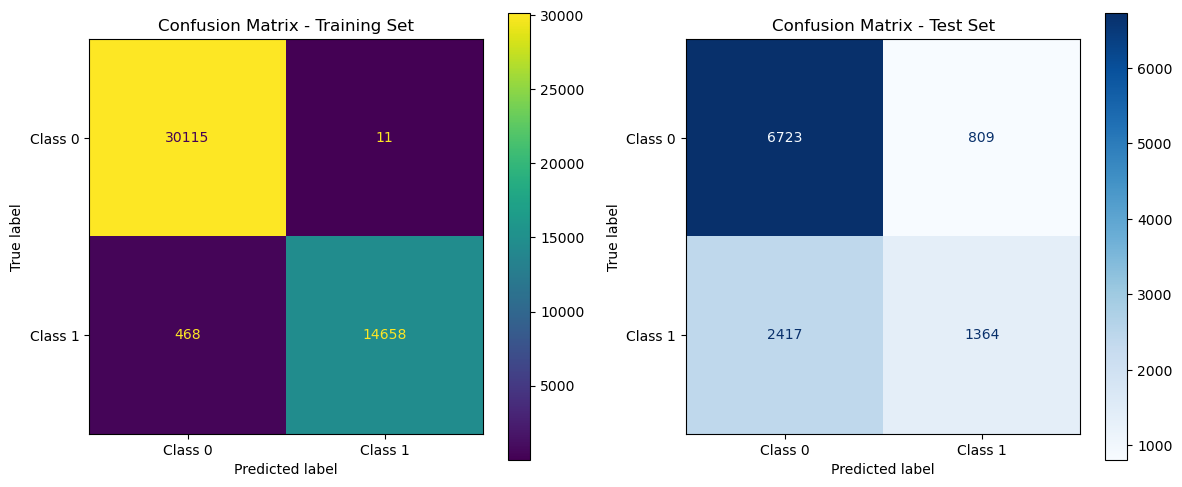

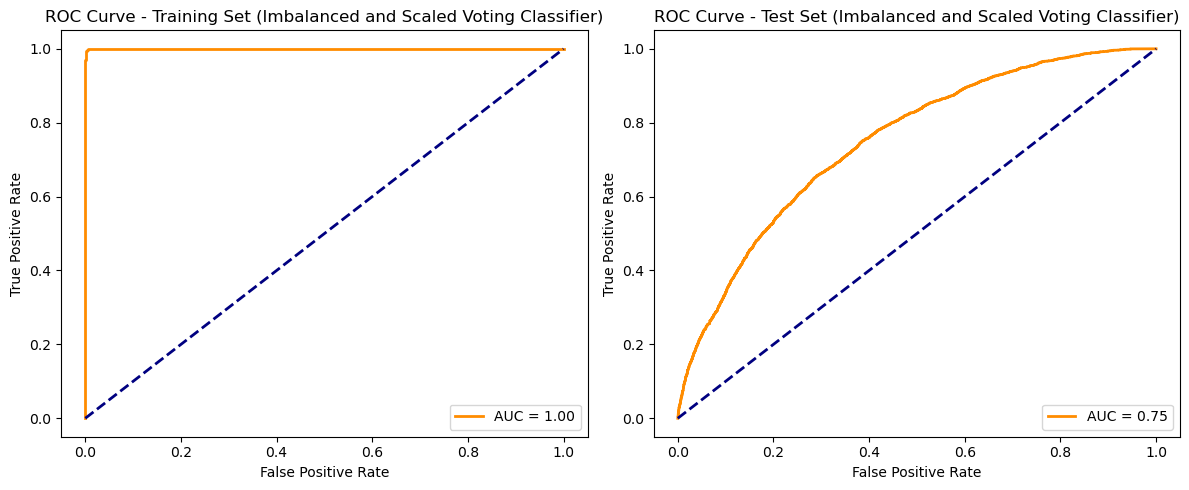

{'Model': 'Imbalanced and Scaled Voting Classifier',
 'Train Score': 0.9894,
 'Accuracy Score': 0.7148,
 'F1 Score': 0.4582,
 'Precision Score': 0.6277,
 'Recall Score': 0.3608,
 'AUC Score': 0.6267}

In [109]:
is_voting_model = VotingClassifier(estimators=[('rf', is_rf_model), ('gb', is_gb_model), ('bagging', is_bagging_model)], voting='soft')
evaluation_is_voting_model = evaluate_model(X_train_scaled, y_train, X_test_scaled, y_test, is_voting_model, 'Imbalanced and Scaled Voting Classifier')
evaluation_is_voting_model

In [110]:
imbalanced_evaluation_dicts = [evaluation_ns_rf_model, evaluation_ns_gb_model,
                    evaluation_ns_bagging_model, evaluation_ns_voting_model,
                    evaluation_is_rf_model,evaluation_is_gb_model,
                    evaluation_is_bagging_model, evaluation_is_voting_model]


# Convert the list of dictionaries to a DataFrame
imbalanced_evaluation_df = pd.DataFrame(imbalanced_evaluation_dicts)

# Display the DataFrame
imbalanced_evaluation_df

,Model,Train Score,Accuracy Score,F1 Score,Precision Score,Recall Score,AUC Score
0,Imbalanced and Non Scaled Random Forest,1.0000,0.7116,0.4519,0.6192,0.3557,0.6230
1,Imbalanced and Non Scaled Gradient Boosting,0.7171,0.7140,0.4345,0.6407,0.3287,0.6181
2,Imbalanced and Non Scaled Bagging Meta-Estimator,1.0000,0.7054,0.4625,0.5926,0.3793,0.6242
3,Imbalanced and Non Scaled Voting Classifier,0.9894,0.7146,0.4578,0.6270,0.3605,0.6264
4,Imbalanced and Scaled Random Forest,1.0000,0.7113,0.4513,0.6186,0.3552,0.6226
5,Imbalanced and Scaled Gradient Boosting,0.7171,0.7140,0.4345,0.6407,0.3287,0.6181
6,Imbalanced and Scaled Bagging Meta-Estimator,1.0000,0.7056,0.4625,0.5931,0.3790,0.6242
7,Imbalanced and Scaled Voting Classifier,0.9894,0.7148,0.4582,0.6277,0.3608,0.6267


## Balance Dataset

In [111]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_scaled_resampled, y_train_scaled_resampled = smote.fit_resample(X_train_scaled, y_train)

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


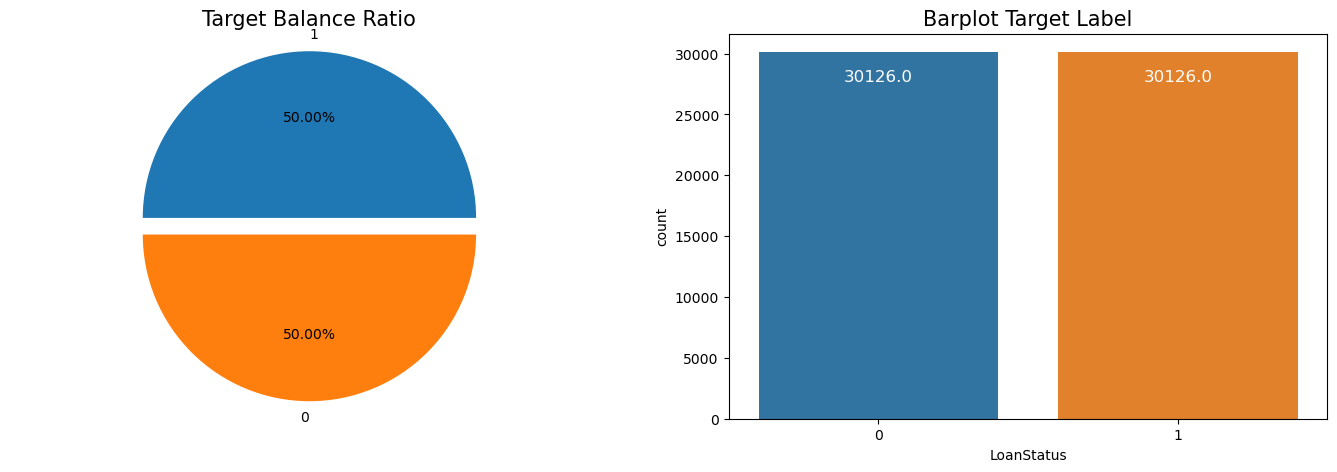

In [112]:
# Convert the NumPy arrays to DataFrames
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['LoanStatus'])

# Create a DataFrame for the balanced dataset
smote_data = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

# Create a figure and subplots
plt.figure(figsize=(17, 5))  # Adjust the figure size as needed

# Plot 1: Pie chart for target imbalance ratio
plt.subplot(121)
plt.pie(round(smote_data['LoanStatus'].value_counts() / len(smote_data) * 100, 2),
        labels=list(smote_data['LoanStatus'].value_counts().index),
        autopct="%.2f%%",
        explode=(0, 0.1))
plt.axis("equal")
plt.title("Target Balance Ratio", size=15)

# Plot 2: Countplot for target label
plt.subplot(122)
ax = sb.countplot(data=smote_data, x='LoanStatus')
plt.title("Barplot Target Label", fontsize=15)

# Annotate the count values on top of the bars
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.4, p.get_height()), ha='center', va='top', color='white', size=12)

plt.show()  # Show the plots

### Balanced and Non Scaled Random Forest

Model Evaluation Balanced and Non Scaled Random Fores

Classification Report: Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30126
           1       1.00      1.00      1.00     30126

    accuracy                           1.00     60252
   macro avg       1.00      1.00      1.00     60252
weighted avg       1.00      1.00      1.00     60252


Classification Report: Test
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      7532
           1       0.57      0.46      0.51      3781

    accuracy                           0.70     11313
   macro avg       0.66      0.64      0.65     11313
weighted avg       0.69      0.70      0.69     11313



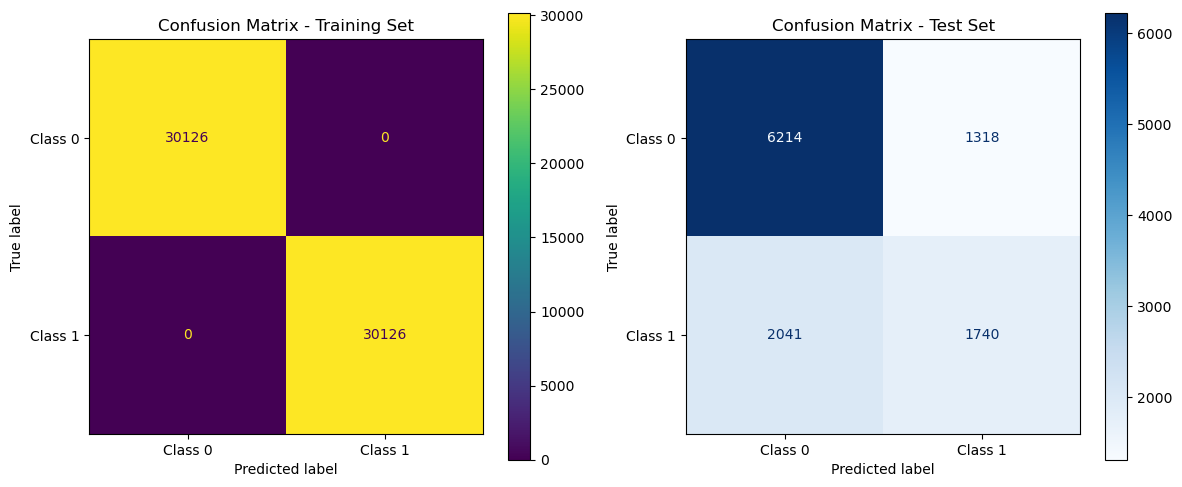

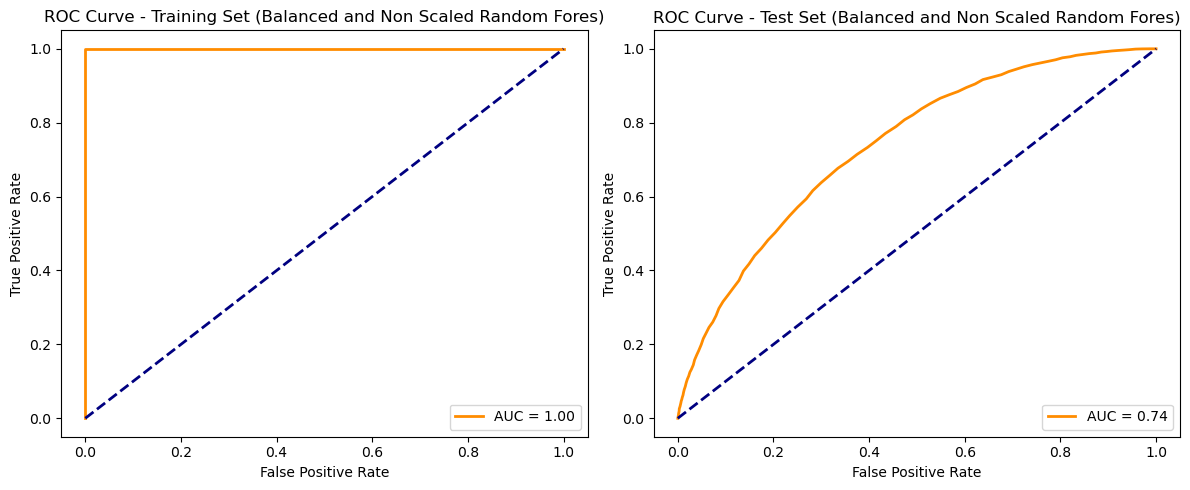

{'Model': 'Balanced and Non Scaled Random Fores',
 'Train Score': 1.0,
 'Accuracy Score': 0.7031,
 'F1 Score': 0.5088,
 'Precision Score': 0.569,
 'Recall Score': 0.4602,
 'AUC Score': 0.6426}

In [113]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluation_rf_model = evaluate_model(X_train_resampled, y_train_resampled, X_test, y_test, rf_model, 'Balanced and Non Scaled Random Fores')
evaluation_rf_model

### Balanced and Non Scaled Gradient Boosting

Model Evaluation Balanced and Non Scaled Gradient Boosting

Classification Report: Train
              precision    recall  f1-score   support

           0       0.74      0.83      0.78     30126
           1       0.80      0.71      0.75     30126

    accuracy                           0.77     60252
   macro avg       0.77      0.77      0.77     60252
weighted avg       0.77      0.77      0.77     60252


Classification Report: Test
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      7532
           1       0.58      0.47      0.52      3781

    accuracy                           0.71     11313
   macro avg       0.67      0.65      0.66     11313
weighted avg       0.70      0.71      0.70     11313



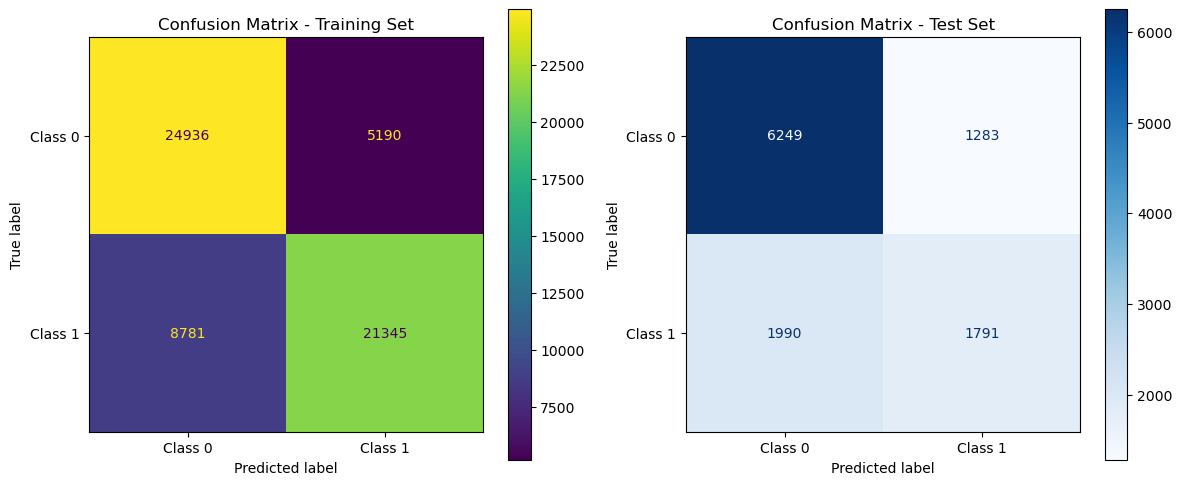

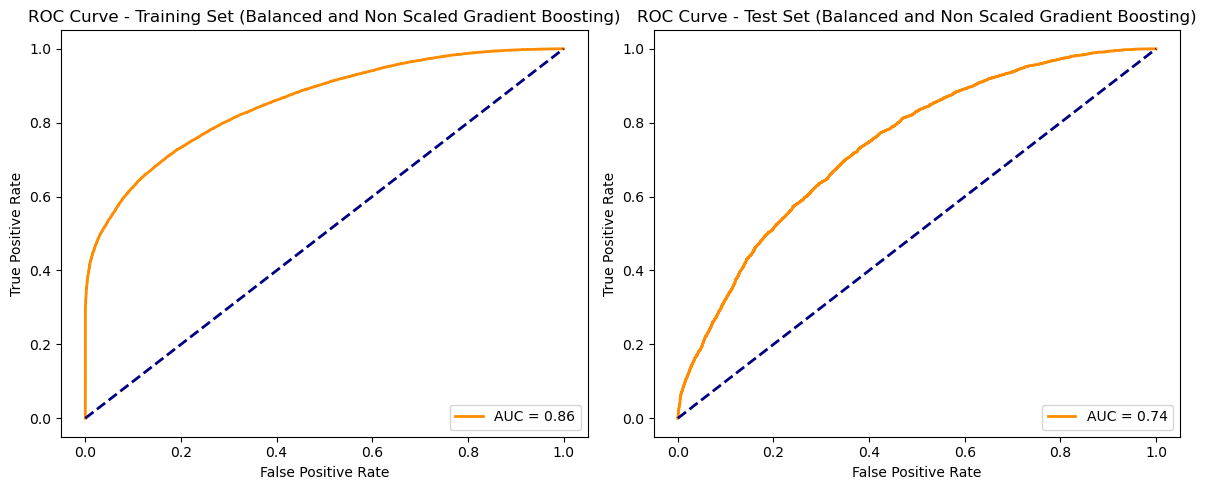

{'Model': 'Balanced and Non Scaled Gradient Boosting',
 'Train Score': 0.7681,
 'Accuracy Score': 0.7107,
 'F1 Score': 0.5225,
 'Precision Score': 0.5826,
 'Recall Score': 0.4737,
 'AUC Score': 0.6517}

In [114]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
evaluation_gb_model = evaluate_model(X_train_resampled, y_train_resampled, X_test, y_test, gb_model, 'Balanced and Non Scaled Gradient Boosting')
evaluation_gb_model

### Balanced and Non Scaled Bagging Meta-Estimator (using Decision Trees)

Model Evaluation Balanced and Non Scaled Bagging Meta-Estimator

Classification Report: Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30126
           1       1.00      1.00      1.00     30126

    accuracy                           1.00     60252
   macro avg       1.00      1.00      1.00     60252
weighted avg       1.00      1.00      1.00     60252


Classification Report: Test
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      7532
           1       0.57      0.45      0.50      3781

    accuracy                           0.70     11313
   macro avg       0.66      0.64      0.64     11313
weighted avg       0.69      0.70      0.69     11313



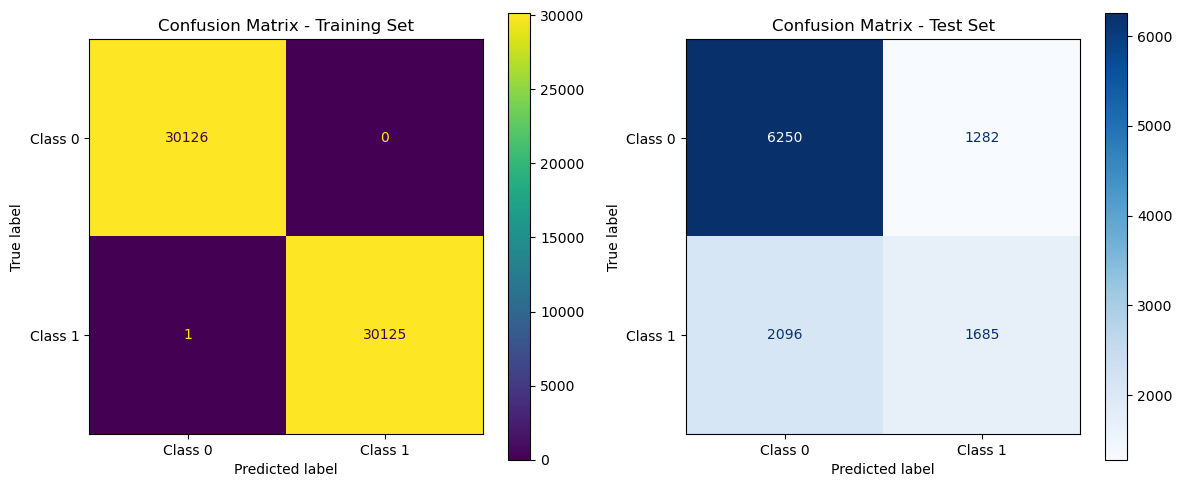

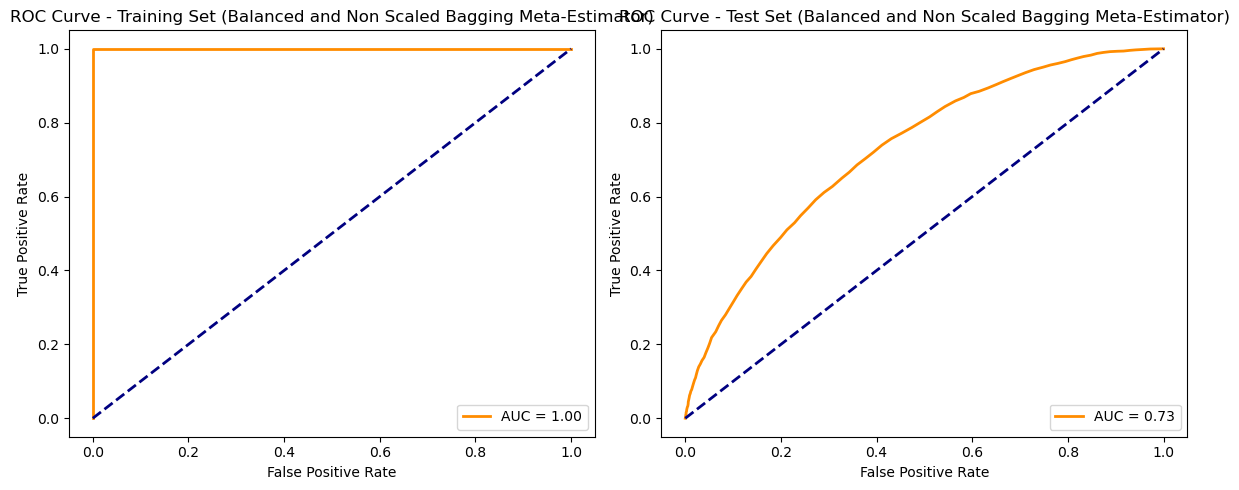

{'Model': 'Balanced and Non Scaled Bagging Meta-Estimator',
 'Train Score': 1.0,
 'Accuracy Score': 0.7014,
 'F1 Score': 0.4994,
 'Precision Score': 0.5679,
 'Recall Score': 0.4456,
 'AUC Score': 0.6377}

In [115]:
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
evaluation_bagging_model = evaluate_model(X_train_resampled, y_train_resampled, X_test, y_test, bagging_model, 'Balanced and Non Scaled Bagging Meta-Estimator')
evaluation_bagging_model

### Balanced and Non Scaled Voting Classifier

Model Evaluation Balanced and Non Scaled Voting Classifier

Classification Report: Train
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     30126
           1       1.00      0.99      0.99     30126

    accuracy                           0.99     60252
   macro avg       0.99      0.99      0.99     60252
weighted avg       0.99      0.99      0.99     60252


Classification Report: Test
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      7532
           1       0.59      0.47      0.52      3781

    accuracy                           0.71     11313
   macro avg       0.67      0.65      0.66     11313
weighted avg       0.70      0.71      0.70     11313



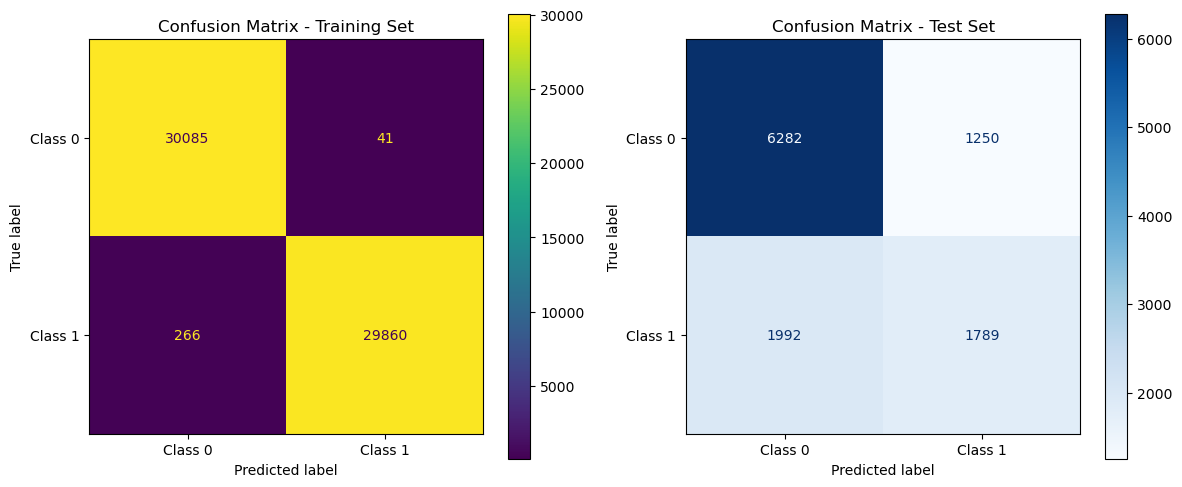

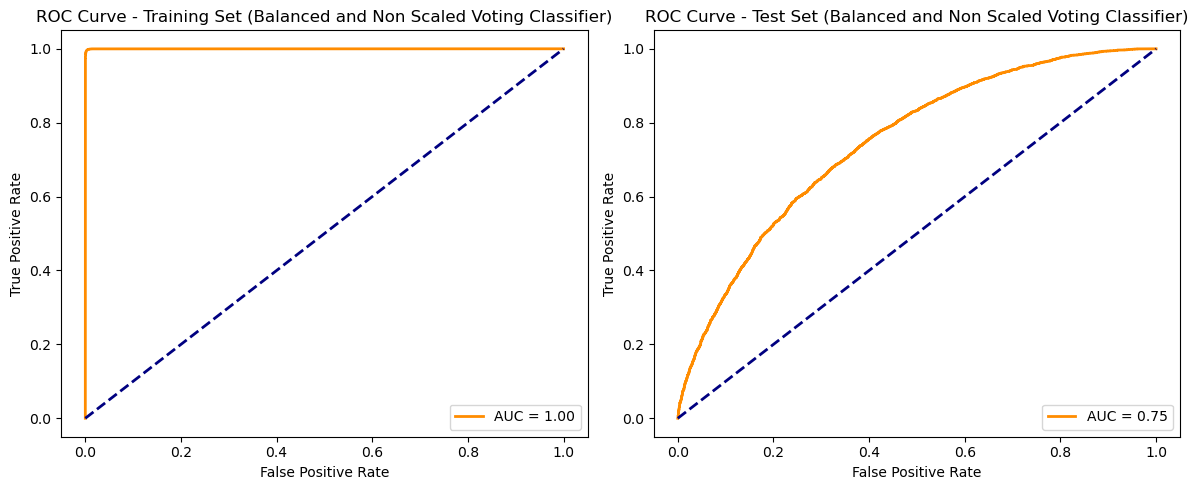

{'Model': 'Balanced and Non Scaled Voting Classifier',
 'Train Score': 0.9949,
 'Accuracy Score': 0.7134,
 'F1 Score': 0.5246,
 'Precision Score': 0.5887,
 'Recall Score': 0.4732,
 'AUC Score': 0.6536}

In [116]:
voting_model = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model),
                                            ('bagging', bagging_model)], voting='soft')
evaluation_voting_model = evaluate_model(X_train_resampled, y_train_resampled, X_test, y_test, voting_model, 'Balanced and Non Scaled Voting Classifier')
evaluation_voting_model

### Balanced and Scaled Random Forest

Model Evaluation Balanced and Scaled Random Forest

Classification Report: Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30126
           1       1.00      1.00      1.00     30126

    accuracy                           1.00     60252
   macro avg       1.00      1.00      1.00     60252
weighted avg       1.00      1.00      1.00     60252


Classification Report: Test
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      7532
           1       0.54      0.52      0.53      3781

    accuracy                           0.69     11313
   macro avg       0.65      0.65      0.65     11313
weighted avg       0.69      0.69      0.69     11313



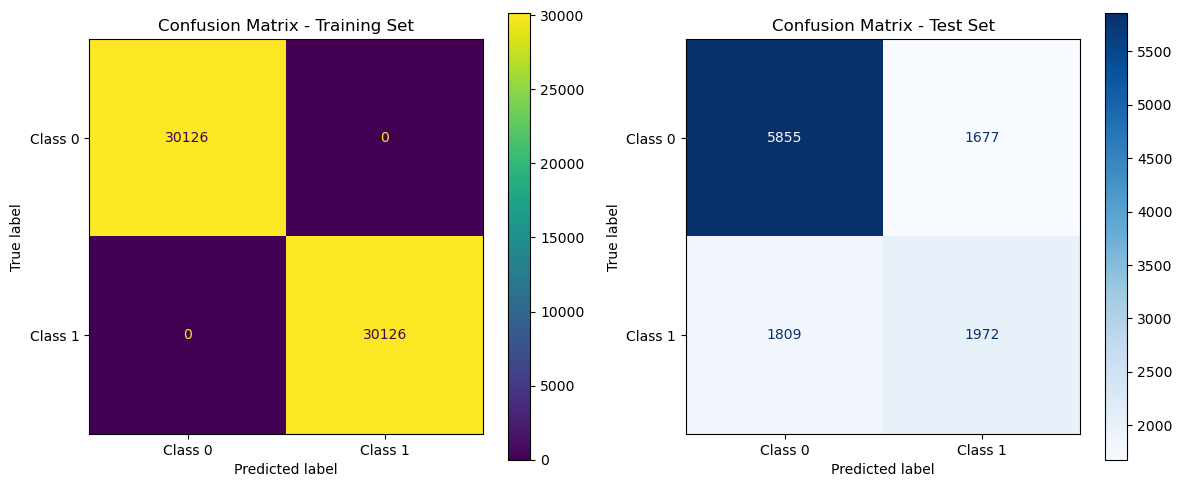

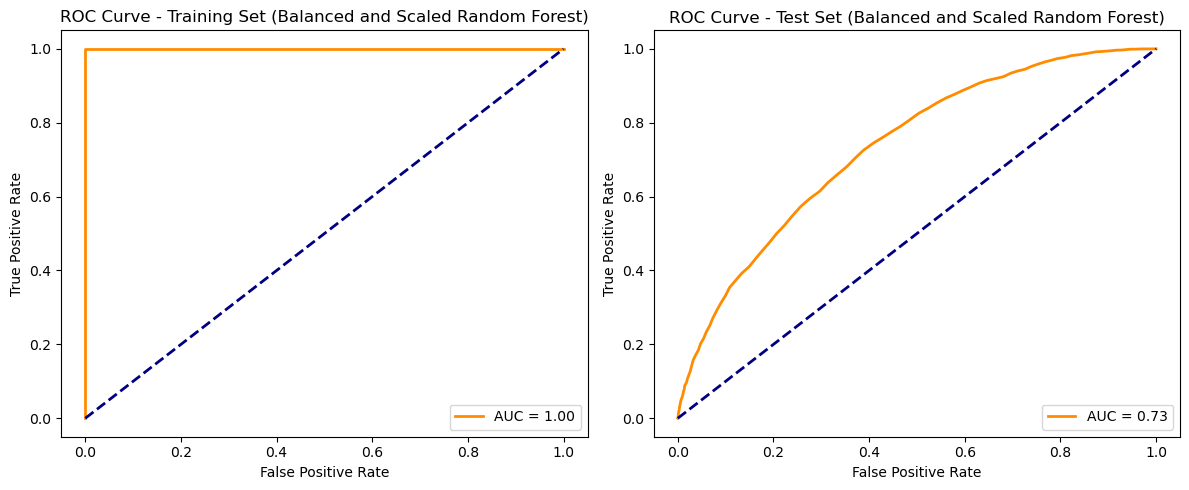

{'Model': 'Balanced and Scaled Random Forest',
 'Train Score': 1.0,
 'Accuracy Score': 0.6919,
 'F1 Score': 0.5308,
 'Precision Score': 0.5404,
 'Recall Score': 0.5216,
 'AUC Score': 0.6495}

In [117]:
bs_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluation_bs_rf_model = evaluate_model(X_train_scaled_resampled, y_train_scaled_resampled, X_test_scaled, y_test, bs_rf_model, 'Balanced and Scaled Random Forest')
evaluation_bs_rf_model

### Balanced and Scaled Gradient Boosting

Model Evaluation Balanced and Scaled Gradient Boosting

Classification Report: Train
              precision    recall  f1-score   support

           0       0.76      0.73      0.74     30126
           1       0.74      0.76      0.75     30126

    accuracy                           0.75     60252
   macro avg       0.75      0.75      0.75     60252
weighted avg       0.75      0.75      0.75     60252


Classification Report: Test
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      7532
           1       0.53      0.61      0.57      3781

    accuracy                           0.69     11313
   macro avg       0.66      0.67      0.66     11313
weighted avg       0.70      0.69      0.70     11313



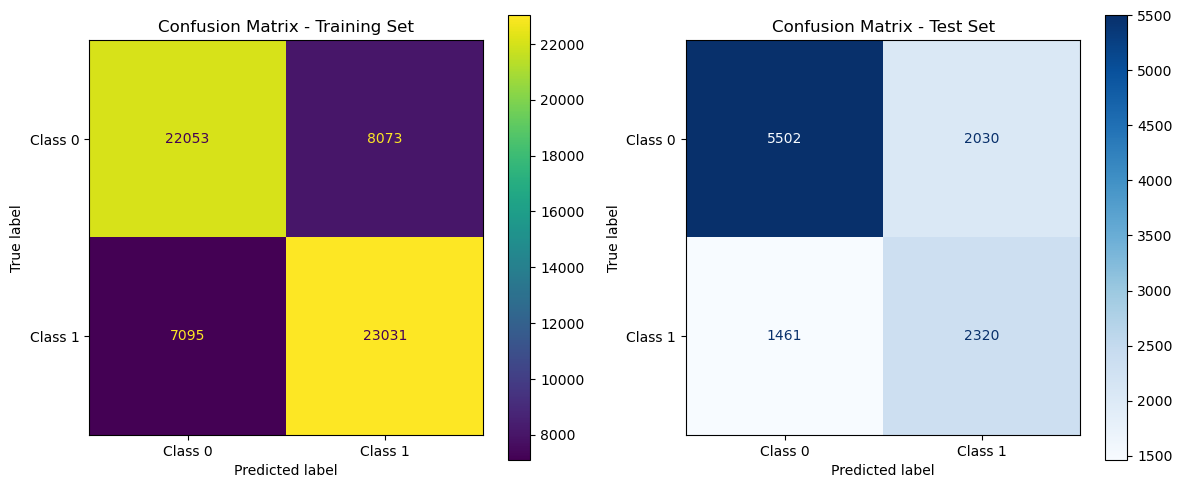

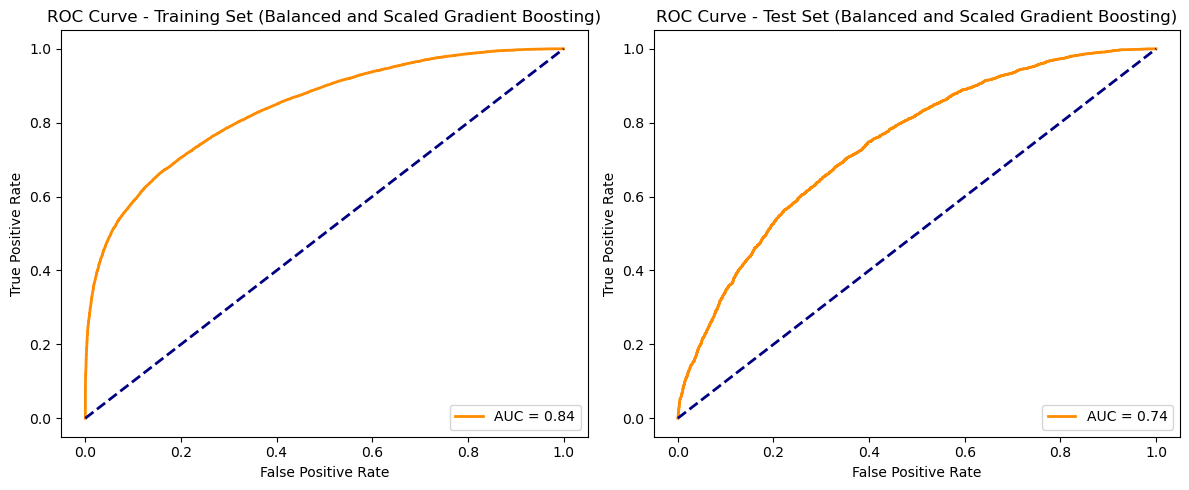

{'Model': 'Balanced and Scaled Gradient Boosting',
 'Train Score': 0.7483,
 'Accuracy Score': 0.6914,
 'F1 Score': 0.5707,
 'Precision Score': 0.5333,
 'Recall Score': 0.6136,
 'AUC Score': 0.672}

In [118]:
bs_gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
evaluation_bs_gb_model = evaluate_model(X_train_scaled_resampled, y_train_scaled_resampled, X_test_scaled, y_test, bs_gb_model, 'Balanced and Scaled Gradient Boosting')
evaluation_bs_gb_model

### Balanced and Scaled Bagging Meta-Estimator (using Decision Trees) 

Model Evaluation Balanced and Scaled Bagging Meta-Estimator

Classification Report: Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30126
           1       1.00      1.00      1.00     30126

    accuracy                           1.00     60252
   macro avg       1.00      1.00      1.00     60252
weighted avg       1.00      1.00      1.00     60252


Classification Report: Test
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      7532
           1       0.54      0.45      0.49      3781

    accuracy                           0.69     11313
   macro avg       0.64      0.63      0.63     11313
weighted avg       0.68      0.69      0.68     11313



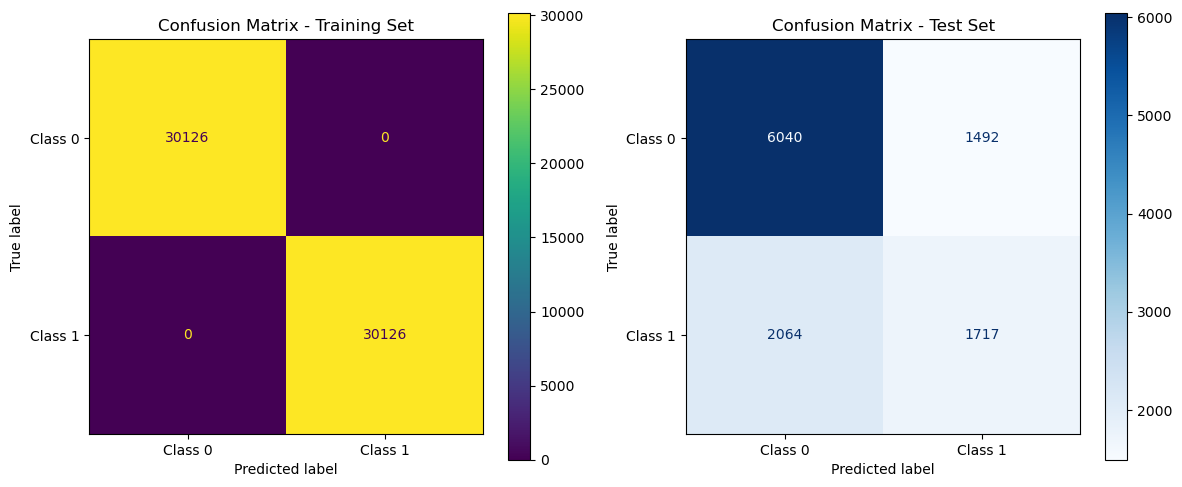

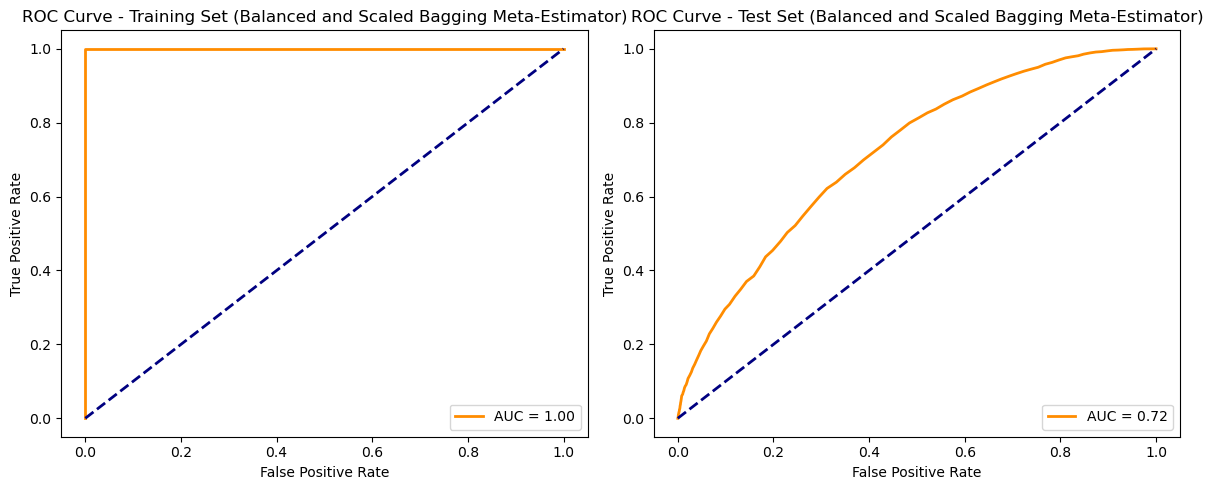

{'Model': 'Balanced and Scaled Bagging Meta-Estimator',
 'Train Score': 1.0,
 'Accuracy Score': 0.6857,
 'F1 Score': 0.4913,
 'Precision Score': 0.5351,
 'Recall Score': 0.4541,
 'AUC Score': 0.628}

In [119]:
bs_bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
evaluation_bs_bagging_model = evaluate_model(X_train_scaled_resampled, y_train_scaled_resampled, X_test_scaled, y_test, bs_bagging_model, 'Balanced and Scaled Bagging Meta-Estimator')
evaluation_bs_bagging_model

### Balanced and Scaled  Voting Classifier (Combining multiple models)

Model Evaluation Balanced and Scaled Voting Classifier

Classification Report: Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30126
           1       1.00      1.00      1.00     30126

    accuracy                           1.00     60252
   macro avg       1.00      1.00      1.00     60252
weighted avg       1.00      1.00      1.00     60252


Classification Report: Test
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      7532
           1       0.56      0.54      0.55      3781

    accuracy                           0.70     11313
   macro avg       0.66      0.66      0.66     11313
weighted avg       0.70      0.70      0.70     11313



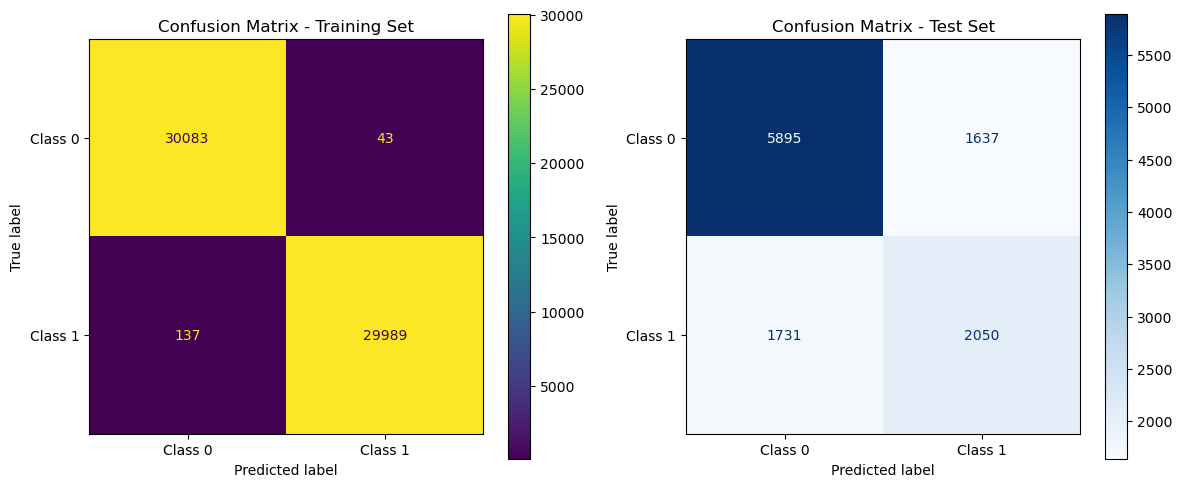

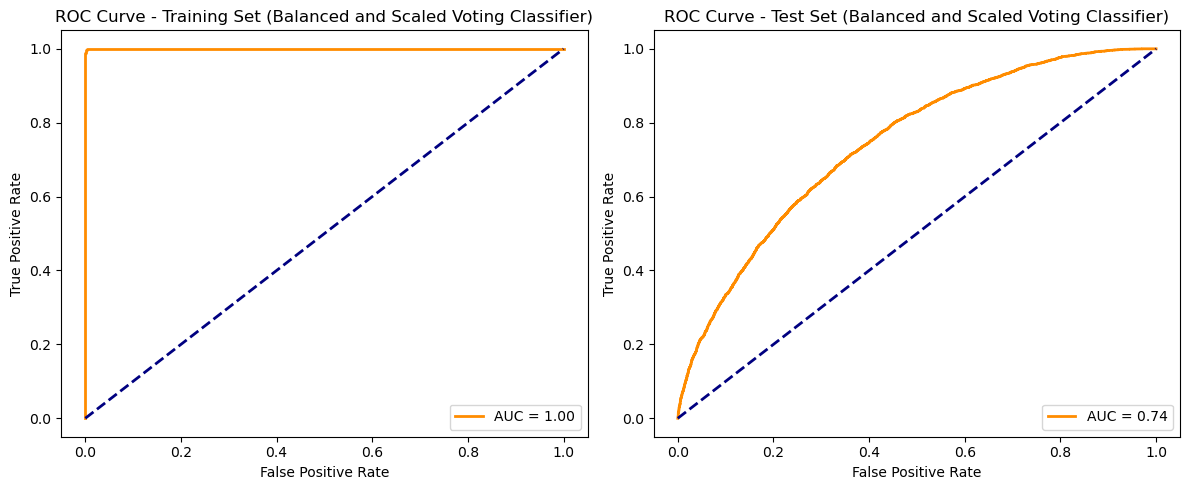

{'Model': 'Balanced and Scaled Voting Classifier',
 'Train Score': 0.997,
 'Accuracy Score': 0.7023,
 'F1 Score': 0.549,
 'Precision Score': 0.556,
 'Recall Score': 0.5422,
 'AUC Score': 0.6624}

In [120]:
bs_voting_model = VotingClassifier(estimators=[('rf', bs_rf_model), ('gb', bs_gb_model),
                                               ('bagging', bs_bagging_model)], voting='soft')

evaluation_bs_voting_model = evaluate_model(X_train_scaled_resampled, y_train_scaled_resampled, X_test_scaled, y_test, bs_voting_model, 'Balanced and Scaled Voting Classifier')
evaluation_bs_voting_model

In [121]:
evaluation_dicts = [evaluation_ns_rf_model, evaluation_ns_gb_model,
                    evaluation_ns_bagging_model, evaluation_ns_voting_model,
                    evaluation_is_rf_model,evaluation_is_gb_model,
                    evaluation_is_bagging_model, evaluation_is_voting_model, 
                    evaluation_rf_model, evaluation_gb_model,
                    evaluation_bagging_model, evaluation_voting_model,
                    evaluation_bs_rf_model,evaluation_bs_gb_model,
                    evaluation_bs_bagging_model, evaluation_bs_voting_model]


# Convert the list of dictionaries to a DataFrame
evaluation_df = pd.DataFrame(evaluation_dicts)

# Display the DataFrame
evaluation_df

,Model,Train Score,Accuracy Score,F1 Score,Precision Score,Recall Score,AUC Score
0,Imbalanced and Non Scaled Random Forest,1.0000,0.7116,0.4519,0.6192,0.3557,0.6230
1,Imbalanced and Non Scaled Gradient Boosting,0.7171,0.7140,0.4345,0.6407,0.3287,0.6181
2,Imbalanced and Non Scaled Bagging Meta-Estimator,1.0000,0.7054,0.4625,0.5926,0.3793,0.6242
3,Imbalanced and Non Scaled Voting Classifier,0.9894,0.7146,0.4578,0.6270,0.3605,0.6264
4,Imbalanced and Scaled Random Forest,1.0000,0.7113,0.4513,0.6186,0.3552,0.6226
5,Imbalanced and Scaled Gradient Boosting,0.7171,0.7140,0.4345,0.6407,0.3287,0.6181
6,Imbalanced and Scaled Bagging Meta-Estimator,1.0000,0.7056,0.4625,0.5931,0.3790,0.6242
7,Imbalanced and Scaled Voting Classifier,0.9894,0.7148,0.4582,0.6277,0.3608,0.6267
8,Balanced and Non Scaled Random Fores,1.0000,0.7031,0.5088,0.5690,0.4602,0.6426
9,Balanced and Non Scaled Gradient Boosting,0.7681,0.7107,0.5225,0.5826,0.4737,0.6517


In [122]:
well_trained_models = evaluation_df[evaluation_df['Train Score'].between(0.9, 1.0)]
well_trained_models

,Model,Train Score,Accuracy Score,F1 Score,Precision Score,Recall Score,AUC Score
0,Imbalanced and Non Scaled Random Forest,1.0000,0.7116,0.4519,0.6192,0.3557,0.6230
2,Imbalanced and Non Scaled Bagging Meta-Estimator,1.0000,0.7054,0.4625,0.5926,0.3793,0.6242
3,Imbalanced and Non Scaled Voting Classifier,0.9894,0.7146,0.4578,0.6270,0.3605,0.6264
4,Imbalanced and Scaled Random Forest,1.0000,0.7113,0.4513,0.6186,0.3552,0.6226
6,Imbalanced and Scaled Bagging Meta-Estimator,1.0000,0.7056,0.4625,0.5931,0.3790,0.6242
7,Imbalanced and Scaled Voting Classifier,0.9894,0.7148,0.4582,0.6277,0.3608,0.6267
8,Balanced and Non Scaled Random Fores,1.0000,0.7031,0.5088,0.5690,0.4602,0.6426
10,Balanced and Non Scaled Bagging Meta-Estimator,1.0000,0.7014,0.4994,0.5679,0.4456,0.6377
11,Balanced and Non Scaled Voting Classifier,0.9949,0.7134,0.5246,0.5887,0.4732,0.6536
12,Balanced and Scaled Random Forest,1.0000,0.6919,0.5308,0.5404,0.5216,0.6495


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


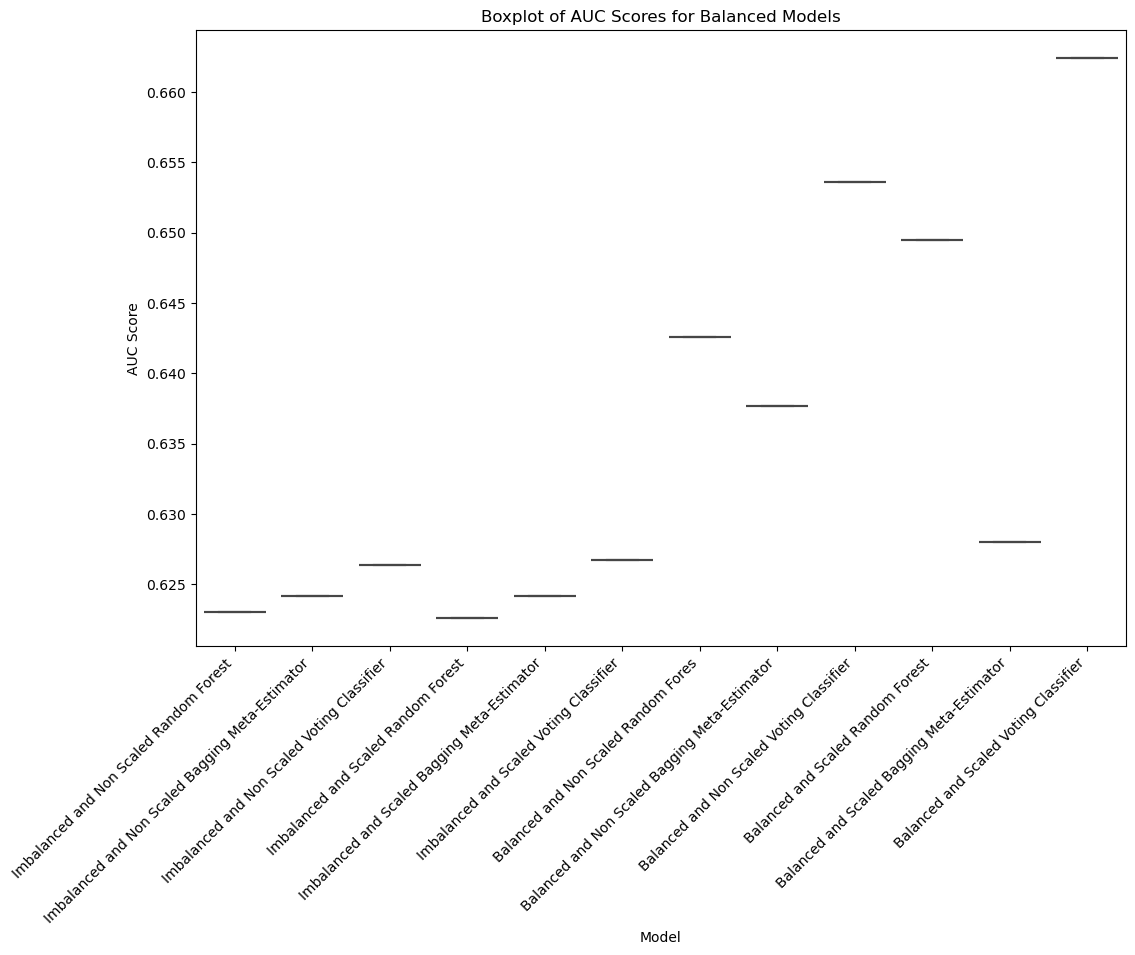

In [123]:
# Create a boxplot for AUC scores
plt.figure(figsize=(12, 8))
sb.boxplot(x="Model", y="AUC Score", data= well_trained_models)
plt.title("Boxplot of AUC Scores for Balanced Models")
plt.xticks(rotation=45, ha="right")
plt.show()

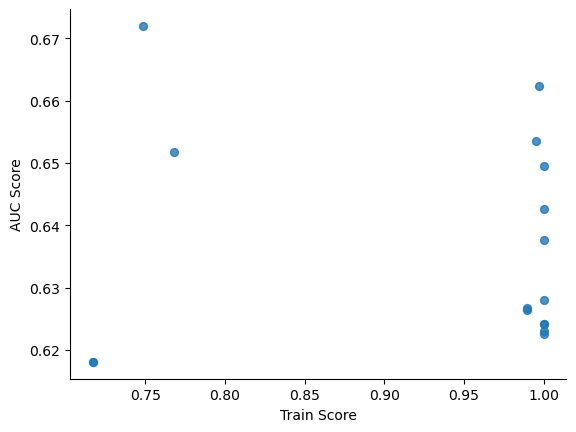

In [124]:
from matplotlib import pyplot as plt
evaluation_df.plot(kind='scatter', x='Train Score', y='AUC Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Cross Validation on well trained models

In [125]:
# Define a cross-validation strategy (Stratified K-Fold for classification)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and print the mean accuracy
models = [("Imbalanced and Non Scaled Random Forest", ns_rf_model),
          ("Imbalanced and Non Scaled Bagging Meta-Estimator", ns_bagging_model),
          ("Imbalanced and Non Scaled Voting Classifier", ns_voting_model),
          ("Imbalanced and Scaled Random Forest", is_rf_model),
          ("Imbalanced and Scaled Voting Classifier", is_voting_model),
          ("Imbalanced and Scaled Bagging Meta-Estimator", is_bagging_model),
          ("Balanced and Non Scaled Random Forest", rf_model),
          ("Balanced and Non Scaled Voting Classifier", voting_model),
          ("Balanced and Non Scaled Bagging Meta-Estimator", bagging_model),
          ("Balanced and Scaled Random Forest", bs_rf_model),
          ("Balanced and Scaled Voting Classifier", bs_voting_model),
          ("Balanced and Scaled Bagging Meta-Estimator", bs_bagging_model),
    
]

# Create an empty list to store dictionaries
results_list = []

# Perform cross-validation and print the mean accuracy
for name, model in models:
    scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    mean_auc = scores.mean()
    std_auc = scores.std()
    
    # Append results to the list
    results_list.append({
        "Model": name,
        "Mean AUC": mean_auc,
        "Standard Deviation": std_auc
    })

    print(f"{name} - Mean AUC: {mean_auc}, Standard Deviation: {std_auc}")

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

Imbalanced and Non Scaled Random Forest - Mean AUC: 0.7318778971888891, Standard Deviation: 0.006561417573312739
Imbalanced and Non Scaled Bagging Meta-Estimator - Mean AUC: 0.7247270728028854, Standard Deviation: 0.00674407736729161
Imbalanced and Non Scaled Voting Classifier - Mean AUC: 0.7405263286733559, Standard Deviation: 0.00609084298822074
Imbalanced and Scaled Random Forest - Mean AUC: 0.7318778971888891, Standard Deviation: 0.006561417573312739
Imbalanced and Scaled Voting Classifier - Mean AUC: 0.7405263286733559, Standard Deviation: 0.00609084298822074
Imbalanced and Scaled Bagging Meta-Estimator - Mean AUC: 0.7247270728028854, Standard Deviation: 0.00674407736729161
Balanced and Non Scaled Random Forest - Mean AUC: 0.7318778971888891, Standard Deviation: 0.006561417573312739
Balanced and Non Scaled Voting Classifier - Mean AUC: 0.7405263286733559, Standard Deviation: 0.00609084298822074
Balanced and Non Scaled Bagging Meta-Estimator - Mean AUC: 0.7247270728028854, Standard

In [126]:
results_df

,Model,Mean AUC,Standard Deviation
0,Imbalanced and Non Scaled Random Forest,0.731878,0.006561
1,Imbalanced and Non Scaled Bagging Meta-Estimator,0.724727,0.006744
2,Imbalanced and Non Scaled Voting Classifier,0.740526,0.006091
3,Imbalanced and Scaled Random Forest,0.731878,0.006561
4,Imbalanced and Scaled Voting Classifier,0.740526,0.006091
5,Imbalanced and Scaled Bagging Meta-Estimator,0.724727,0.006744
6,Balanced and Non Scaled Random Forest,0.731878,0.006561
7,Balanced and Non Scaled Voting Classifier,0.740526,0.006091
8,Balanced and Non Scaled Bagging Meta-Estimator,0.724727,0.006744
9,Balanced and Scaled Random Forest,0.731878,0.006561


- BEST MODEL Balanced and Scaled Stacking Classifier

## Hyperparameter Tuning with RandomizedCV (Balanced and Scaled Stacking Classifier)

In [127]:
from scipy.stats import uniform

In [128]:
from scipy.stats import uniform, randint
# Define the parameter distribution for the hyperparameters you want to tune
param_dist = {
    'rf__n_estimators': randint(10, 200),
    'rf__max_depth': randint(1, 21),
    'rf__min_samples_split': randint(2, 12),
    'gb__n_estimators': randint(10, 200),
    'gb__learning_rate': uniform(loc=0.01, scale=0.2),
    'gb__max_depth': randint(3, 10),
    'gb__min_samples_split': randint(2, 12),
    'bagging__n_estimators': randint(10, 200),
    'bagging__max_samples': uniform(loc=0.5, scale=0.5),
    'bagging__max_features': uniform(loc=0.5, scale=0.5),
}

# Use this parameter distribution in RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=bs_voting_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=cv,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

# Perform RandomizedSearchCV
random_search.fit(X_train_scaled_resampled, y_train_scaled_resampled)

# Evaluate the model with the best hyperparameters on the test set
best_rf_model = random_search.best_estimator_
test_score = best_rf_model.score(X_test_scaled, y_test)
test_probabilities = best_rf_model.predict_proba(X_test_scaled)[:, 1]
auc_score = roc_auc_score(y_test, test_probabilities) # Calculate auc_score

# Print the best parameters and accuracy
print(f"Best Hyperparameters: {random_search.best_params_}")
print("AUC Score with Best Hyperparameters:", auc_score) # Print auc_score

Best Hyperparameters: {'bagging__max_features': 0.6872700594236812, 'bagging__max_samples': 0.9753571532049581, 'bagging__n_estimators': 116, 'gb__learning_rate': 0.16593820005455387, 'gb__max_depth': 7, 'gb__min_samples_split': 8, 'gb__n_estimators': 131, 'rf__max_depth': 19, 'rf__min_samples_split': 8, 'rf__n_estimators': 84}
AUC Score with Best Hyperparameters: 0.7470512834738582


## Feature Importance with Tuned Balanced and Scaled Stacking Classifier

<Figure size 1200x800 with 0 Axes>

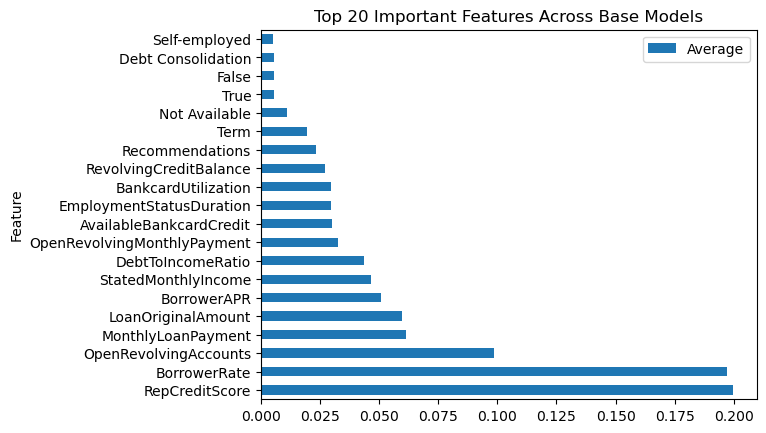

In [129]:
# Get feature importances from each base model
rf_feat_importances = bs_rf_model.feature_importances_
gb_feat_importances = bs_gb_model.feature_importances_
#bagging_feat_importances = bs_bagging_model.feature_importances_

# Average feature importances across base models (you can use other strategies if needed)
avg_feat_importances = (rf_feat_importances + gb_feat_importances) / 2

# Create a DataFrame for better visualization
feat_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest': rf_feat_importances,
    'GradientBoosting': gb_feat_importances,
    #'Bagging': bagging_feat_importances,
    'Average': avg_feat_importances
})

# Plot the top 20 important features
plt.figure(figsize=(12, 8))
feat_importances_df.sort_values(by='Average', ascending=False).head(20).plot(x='Feature', y='Average', kind='barh')
plt.title("Top 20 Important Features Across Base Models")
plt.show()

# Model Interpretabilty

## Scenario Analysis

In [130]:
bs_voting_model.fit(X_train_scaled_resampled, y_train_scaled_resampled)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('bagging',
                              BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                n_estimators=100,
                                                random_state=42))],
                 voting='soft')

In [187]:
# Function to perform sensitivity analysis
def sensitivity_analysis(model, X, y, feature_name, factor_values):
    results = []

    for factor_value in factor_values:
        # Create a copy of the data
        X_perturbed = X.copy()

        # Perturb the feature based on the scenario
        X_perturbed[feature_name] *= factor_value

        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_perturbed, y, test_size=0.2, random_state=42)

        # Train the model on the perturbed data
        model.fit(X_train, y_train)

        # Evaluate the model on the original test set
        perturbed_predictions = model.predict(X_test)
        perturbed_accuracy = roc_auc_score(y_test, perturbed_predictions)

        # Append results
        result = {
            'Feature': feature_name,
            'Factor': factor_value,
            'Accuracy': perturbed_accuracy
        }
        results.append(result)

    return pd.DataFrame(results)

# Load your dataset (replace this with your actual dataset loading code)
# X, y = load_your_dataset()

# Define sensitivity scenarios
sensitivity_scenarios = {
    'StatedMonthlyIncome': [1.2, 1.1, 0.9, 0.8],
    'RepCreditScore': [1.2, 1.1, 0.9, 0.8],
    'BorrowerRate': [1.2, 1.1, 0.9, 0.8],
    'BorrowerAPR': [1.2, 1.1, 0.9, 0.8],
    'MonthlyLoanPayment': [1.2, 1.1, 0.9, 0.8]
}


# Perform sensitivity analysis for each feature
results = []
for feature, values in sensitivity_scenarios.items():
    sensitivity_results = sensitivity_analysis(bs_voting_model, X, y, feature, values)
    results.append(sensitivity_results)

# Combine results for all features
final_results = pd.concat(results, ignore_index=True)

# Print the final results
print(final_results)


                Feature  Factor  Accuracy
0   StatedMonthlyIncome     1.2  0.623650
1   StatedMonthlyIncome     1.1  0.623319
2   StatedMonthlyIncome     0.9  0.623650
3   StatedMonthlyIncome     0.8  0.623253
4        RepCreditScore     1.2  0.623518
5        RepCreditScore     1.1  0.623518
6        RepCreditScore     0.9  0.623518
7        RepCreditScore     0.8  0.623584
8          BorrowerRate     1.2  0.623451
9          BorrowerRate     1.1  0.623319
10         BorrowerRate     0.9  0.623120
11         BorrowerRate     0.8  0.623451
12          BorrowerAPR     1.2  0.623650
13          BorrowerAPR     1.1  0.623518
14          BorrowerAPR     0.9  0.623650
15          BorrowerAPR     0.8  0.623518
16   MonthlyLoanPayment     1.2  0.623518
17   MonthlyLoanPayment     1.1  0.623518
18   MonthlyLoanPayment     0.9  0.623518
19   MonthlyLoanPayment     0.8  0.623518


## Shap

In [159]:
bs_rf_model.fit(X_train_scaled_resampled, y_train_scaled_resampled)

RandomForestClassifier(random_state=42)

In [160]:
# Create a SHAP explainer
explainer = shap.TreeExplainer(bs_rf_model)

In [170]:
shap_values = explainer.shap_values(X_test.iloc[:100])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
The `ipykernel.comm.Comm` class has bee

  0%|          | 0/200 [00:00<?, ?it/s]

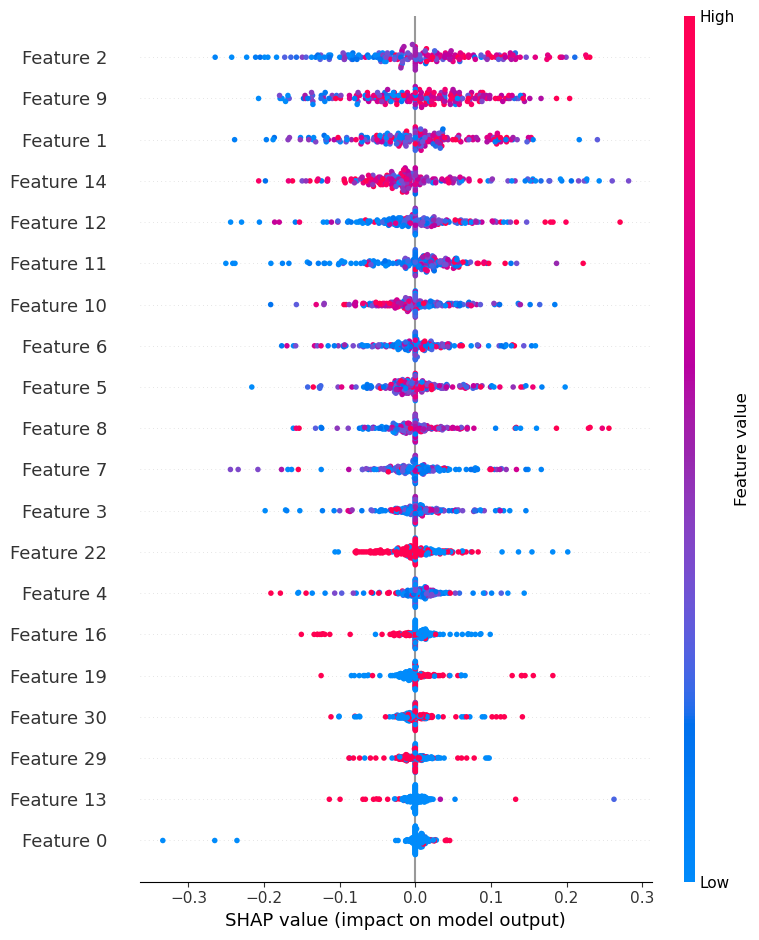

In [171]:
ex = shap.KernelExplainer(bs_rf_model[2].predict, shap.sample(X_train_scaled_resampled,200))
shap_values = ex.shap_values(shap.sample(X_train_scaled_resampled,200))
shap.summary_plot(shap_values, shap.sample(X_train_scaled_resampled,200),max_display = 20)

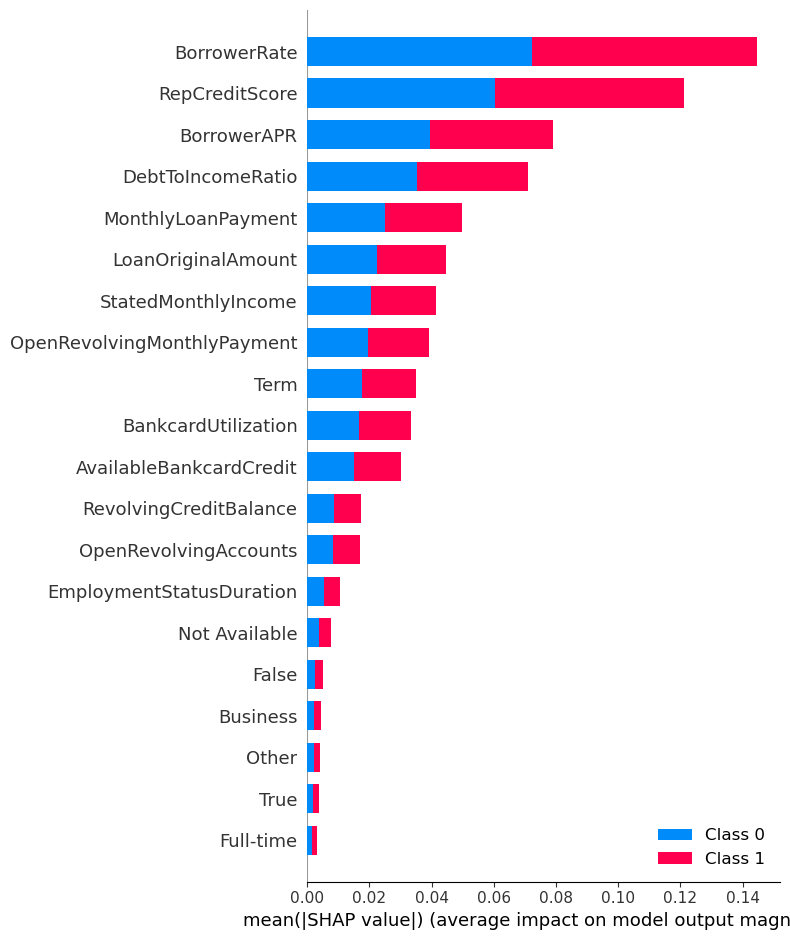

In [172]:
# Calculate SHAP values for a set of samples (e.g., the first 100 samples in the test set)
shap_values = explainer.shap_values(X_test.iloc[:100])

# Summary plot
shap.summary_plot(shap_values, X_test.iloc[:100], feature_names=X_test.columns)

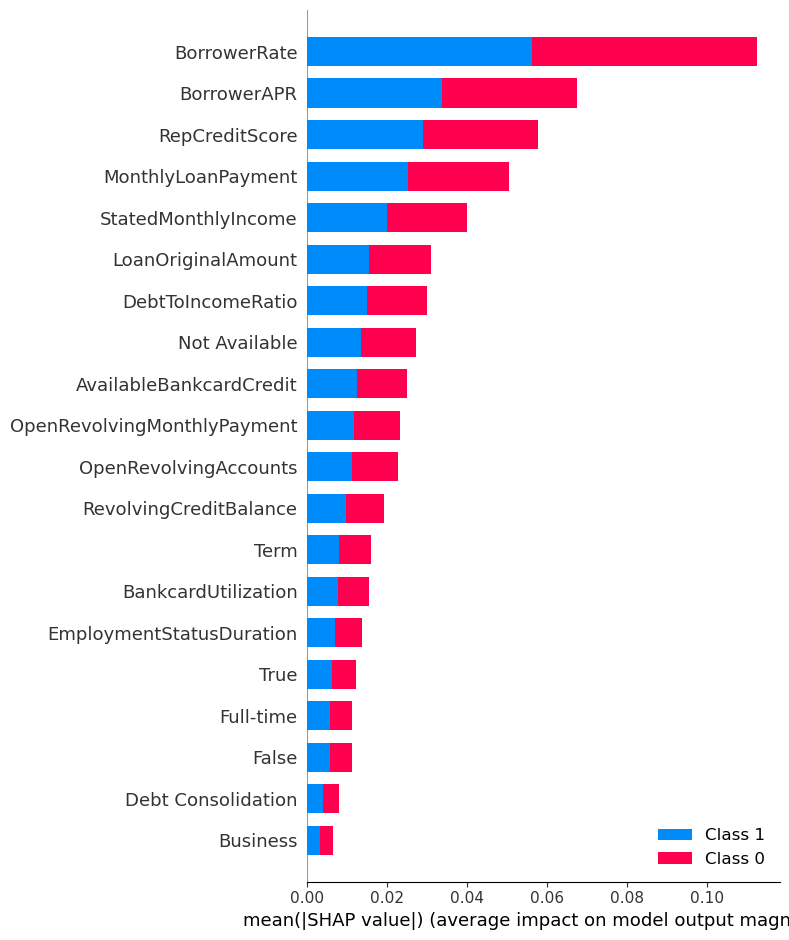

In [173]:
# Train a model (in this case, a RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for a set of samples (e.g., the first 100 samples in the test set)
shap_values = explainer.shap_values(X_test.iloc[:100])

# Summary plot
shap.summary_plot(shap_values, X_test.iloc[:100], feature_names=X_test.columns)

## Association Mining

In [136]:
df_association = df_copy.copy()

In [137]:
# Encode the 'LoanStatus' column
df_association['LoanStatus'] = label_encoder.fit_transform(df_association['LoanStatus'])

In [138]:
df_mining = df_association['LoanStatus']

In [139]:
df_mining.value_counts()

LoanStatus
0    37658
1    18907
Name: count, dtype: int64

In [140]:
df_balanced, y_balanced = RandomUnderSampler().fit_resample(df_association, df_mining)

In [141]:
def one_hot_encode(cols, df):
    one_hot_list = []
    for col in cols:
        dummies = pd.get_dummies(df[col], prefix=col)
        one_hot_list.append(dummies)

    return pd.concat(one_hot_list, axis=1)

In [142]:
df_balanced.columns

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'AvailableBankcardCredit', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'RevolvingCreditBalance',
       'DebtToIncomeRatio', 'BankcardUtilization', 'StatedMonthlyIncome',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'Recommendations',
       'RepCreditScore', 'LoanStatus'],
      dtype='object')

In [145]:
cols = ['Term', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'AvailableBankcardCredit', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'RevolvingCreditBalance',
       'DebtToIncomeRatio', 'BankcardUtilization', 'StatedMonthlyIncome',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'Recommendations',
       'RepCreditScore', 'LoanStatus']
df_acc_onehot =  one_hot_encode(cols, df_balanced)
df_acc_onehot

,Term_12,Term_36,Term_60,BorrowerAPR_0.00653,BorrowerAPR_0.00864,BorrowerAPR_0.01315,BorrowerAPR_0.01325,BorrowerAPR_0.01548,BorrowerAPR_0.01647,BorrowerAPR_0.0165,...,RepCreditScore_749.5,RepCreditScore_769.5,RepCreditScore_789.5,RepCreditScore_809.5,RepCreditScore_829.5,RepCreditScore_849.5,RepCreditScore_869.5,RepCreditScore_889.5,LoanStatus_0,LoanStatus_1
35274,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
15180,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
36067,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
16405,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
45220,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56550,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
56551,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
56555,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
56557,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [146]:
frequent_items = apriori(df_acc_onehot, min_support=0.2, use_colnames=True)
frequent_items["length"] = frequent_items["itemsets"].apply(lambda x: len(x))
frequent_items

,support,itemsets,length
0,0.894087,(Term_36),1
1,0.328979,(ListingCategory_Debt Consolidation),1
2,0.301529,(ListingCategory_Not Available),1
3,0.752367,(EmploymentStatus_Full-time),1
4,0.529936,(IsBorrowerHomeowner_False),1
...,...,...,...
62,0.318057,"(Recommendations_0, LoanStatus_0, Term_36, Emp...",4
63,0.285767,"(LoanStatus_1, Recommendations_0, Term_36, Emp...",4
64,0.213122,"(Recommendations_0, IsBorrowerHomeowner_False,...",4
65,0.229941,"(LoanStatus_1, Recommendations_0, IsBorrowerHo...",4


### Generating Rules

In [147]:
rule_1 = association_rules(frequent_items, metric="lift", min_threshold=1)
rule_1.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ListingCategory_Not Available),(Term_36),0.301529,0.894087,0.301529,1.000000,1.118460,0.031936,inf,0.151636
1,(Term_36),(ListingCategory_Not Available),0.894087,0.301529,0.301529,0.337247,1.118460,0.031936,1.053895,1.000000
2,(IsBorrowerHomeowner_False),(Term_36),0.529936,0.894087,0.478421,0.902790,1.009734,0.004612,1.089524,0.020507
3,(Term_36),(IsBorrowerHomeowner_False),0.894087,0.529936,0.478421,0.535094,1.009734,0.004612,1.011095,0.091016
4,(LoanStatus_0),(Term_36),0.500000,0.894087,0.448247,0.896493,1.002692,0.001203,1.023250,0.005369
5,(Term_36),(LoanStatus_0),0.894087,0.500000,0.448247,0.501346,1.002692,0.001203,1.002699,0.025345
6,(ListingCategory_Debt Consolidation),(EmploymentStatus_Full-time),0.328979,0.752367,0.297826,0.905305,1.203277,0.050314,2.615073,0.251759
7,(EmploymentStatus_Full-time),(ListingCategory_Debt Consolidation),0.752367,0.328979,0.297826,0.395852,1.203277,0.050314,1.110691,0.682202
8,(Recommendations_0),(ListingCategory_Debt Consolidation),0.933887,0.328979,0.310203,0.332163,1.009679,0.002974,1.004768,0.144998
9,(ListingCategory_Debt Consolidation),(Recommendations_0),0.328979,0.933887,0.310203,0.942926,1.009679,0.002974,1.158376,0.014286


In [148]:
# get the association rules in a dataframe

rule_2 = association_rules(frequent_items, metric="confidence", min_threshold=0.7)
rule_2.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ListingCategory_Debt Consolidation),(Term_36),0.328979,0.894087,0.273973,0.832797,0.931450,-0.020163,0.633442,-0.098836
1,(ListingCategory_Not Available),(Term_36),0.301529,0.894087,0.301529,1.000000,1.118460,0.031936,inf,0.151636
2,(Term_36),(EmploymentStatus_Full-time),0.894087,0.752367,0.657138,0.734982,0.976893,-0.015544,0.934401,-0.182560
3,(EmploymentStatus_Full-time),(Term_36),0.752367,0.894087,0.657138,0.873427,0.976893,-0.015544,0.836776,-0.087191
4,(IsBorrowerHomeowner_False),(Term_36),0.529936,0.894087,0.478421,0.902790,1.009734,0.004612,1.089524,0.020507
5,(IsBorrowerHomeowner_True),(Term_36),0.470064,0.894087,0.415666,0.884276,0.989027,-0.004612,0.915219,-0.020507
6,(Recommendations_0),(Term_36),0.933887,0.894087,0.829772,0.888514,0.993768,-0.005204,0.950017,-0.086642
7,(Term_36),(Recommendations_0),0.894087,0.933887,0.829772,0.928066,0.993768,-0.005204,0.919086,-0.055904
8,(LoanStatus_0),(Term_36),0.500000,0.894087,0.448247,0.896493,1.002692,0.001203,1.023250,0.005369
9,(LoanStatus_1),(Term_36),0.500000,0.894087,0.445840,0.891680,0.997308,-0.001203,0.977783,-0.005369


In [149]:
# Extract the top rule from rule_1
top_rule_1 = rule_1.iloc[4]

# Extract the antecedent and consequent items
antecedent = list(top_rule_1['antecedents'])
consequent = list(top_rule_1['consequents'])

# Interpret the rule in the context of accidents in 2020
print("Association Rule Analysis for Loans")
print("----------------------------------------------------")
print("If there was an Loan involving:")
print(", ".join(antecedent))  # Join the items in the list
print("Then there is a likelihood of a loan involving:")
print(", ".join(consequent))
print("Key Metrics:")
print(f"Support: {top_rule_1['support']:.4f} (Percentage of loans involving {', '.join(antecedent)})")
print(f"Confidence: {top_rule_1['confidence']:.4f} (Conditional probability of loan involving {', '.join(consequent)} given {', '.join(antecedent)})")
print(f"Lift: {top_rule_1['lift']:.4f} (Strength of association between loans involving {', '.join(antecedent)} and {', '.join(consequent)})")


Association Rule Analysis for Loans
----------------------------------------------------
If there was an Loan involving:
LoanStatus_0
Then there is a likelihood of a loan involving:
Term_36
Key Metrics:
Support: 0.4482 (Percentage of loans involving LoanStatus_0)
Confidence: 0.8965 (Conditional probability of loan involving Term_36 given LoanStatus_0)
Lift: 1.0027 (Strength of association between loans involving LoanStatus_0 and Term_36)


In [150]:
# Extract the top rule_2 from rule_1
top_rule_2 = rule_1.iloc[13]

# Extract the antecedent and consequent items
antecedent = list(top_rule_2['antecedents'])
consequent = list(top_rule_2['consequents'])

# Interpret the rule in the context of accidents in 2020
print("Association Rule Analysis for Loans")
print("----------------------------------------------------")
print("If there was an Loan involving:")
print(", ".join(antecedent))  # Join the items in the list
print("Then there is a likelihood of a loan involving:")
print(", ".join(consequent))
print("Key Metrics:")
print(f"Support: {top_rule_1['support']:.4f} (Percentage of loans involving {', '.join(antecedent)})")
print(f"Confidence: {top_rule_1['confidence']:.4f} (Conditional probability of loan involving {', '.join(consequent)} given {', '.join(antecedent)})")
print(f"Lift: {top_rule_1['lift']:.4f} (Strength of association between loans involving {', '.join(antecedent)} and {', '.join(consequent)})")


Association Rule Analysis for Loans
----------------------------------------------------
If there was an Loan involving:
EmploymentStatus_Full-time
Then there is a likelihood of a loan involving:
LoanStatus_0
Key Metrics:
Support: 0.4482 (Percentage of loans involving EmploymentStatus_Full-time)
Confidence: 0.8965 (Conditional probability of loan involving LoanStatus_0 given EmploymentStatus_Full-time)
Lift: 1.0027 (Strength of association between loans involving EmploymentStatus_Full-time and LoanStatus_0)


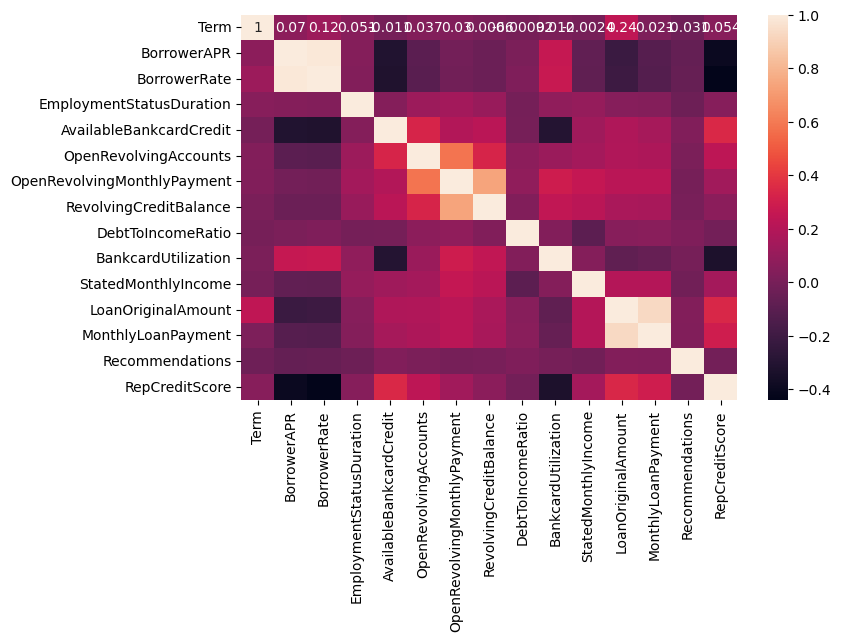

In [152]:
# Assuming df_association is your DataFrame
numeric_variables = df_association.select_dtypes(include=['float64', 'int64'])

# Create a copy of numeric variables for further processing
selected_variables = numeric_variables.copy()

# Now you can use selected_variables for your heatmap
plt.figure(figsize=(8, 5))
sb.heatmap(selected_variables.corr(), annot=True)
plt.show()

In [157]:
selected_variables.describe()

,Term,BorrowerAPR,BorrowerRate,EmploymentStatusDuration,AvailableBankcardCredit,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,RevolvingCreditBalance,DebtToIncomeRatio,BankcardUtilization,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,RepCreditScore
count,56565.000000,56565.000000,56565.000000,56565.000000,56565.000000,56565.000000,56565.000000,5.656500e+04,56565.000000,56565.000000,56565.000000,56565.000000,56565.000000,56565.000000,56565.000000
mean,37.204137,0.224277,0.202012,83.353802,10812.937798,6.161708,330.341731,1.590862e+04,0.268729,0.535699,5055.459189,6347.202369,226.170103,0.087510,681.839433
std,7.671680,0.087809,0.080824,79.785664,20542.456297,4.502880,447.837070,3.161398e+04,0.707617,0.327493,5650.539780,5251.270210,185.646316,0.448674,80.909778
min,12.000000,0.006530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,9.500000
25%,36.000000,0.152260,0.137500,24.000000,716.000000,3.000000,65.000000,2.106000e+03,0.110000,0.270000,2833.333333,2800.000000,100.870000,0.000000,649.500000
50%,36.000000,0.218220,0.198200,66.000000,4793.000000,5.000000,190.000000,8.079000e+03,0.190000,0.561309,4166.666667,4500.000000,173.710000,0.000000,689.500000
75%,36.000000,0.295880,0.269900,101.000000,11210.225447,8.000000,425.000000,1.759871e+04,0.290000,0.810000,6250.000000,8000.000000,304.400000,0.000000,729.500000
max,60.000000,0.423950,0.360000,755.000000,646285.000000,51.000000,14985.000000,1.435667e+06,10.010000,5.950000,618547.833333,35000.000000,2251.510000,39.000000,889.500000
